In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
vasili_stats = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/plots/SupTable_Sample_Stats_wGT_QC.tsv"
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

vasili_table = pd.read_csv(vasili_stats, sep="\t")
sub_vasili = vasili_table.loc[(vasili_table.finalQC != "fail")
                              & (vasili_table.cov_chrA >= 20)
                              & (vasili_table.remove_as_relative != True)
                              & (vasili_table.remove_manual != True)
                              & (~vasili_table.ID.str.startswith("SAMEA11633"))]


In [3]:
female_IDs = sub_vasili.loc[sub_vasili.gSEX == "F"].ID

Here, I will pick out the best cluster based on number of X haplotypes (1 for males, 2 for females) and divergence from reference. If possible, I want 3 or more X haplotypes.

In [4]:
#glob.glob("../results/window_stats_20x_inds/*0.1cutoff_fst*")[:1]
for s in sub_vasili.species_genotyping.unique():
    print(s)

Allenopithecus_nigroviridis_ssp
Aotus_azarai_ssp
Aotus_griseimembra_ssp
Aotus_nancymaae_ssp
Aotus_trivirgatus_ssp
Aotus_vociferans_ssp
Alouatta_belzebul_ssp
Alouatta_caraya_ssp
Alouatta_discolor_ssp
Alouatta_juara_ssp
Alouatta_macconnelli_ssp
Alouatta_palliata_ssp
Alouatta_seniculus_ssp
Ateles_belzebuth_ssp
Ateles_chamek_ssp
Ateles_geoffroyi_ssp
Ateles_marginatus_ssp
Ateles_paniscus_ssp
Brachyteles_hypoxanthus_ssp
Lagothrix_lagotricha_ssp
Callimico_goeldii_ssp
Callithrix_geoffroyi_ssp
Callithrix_jacchus_ssp
Callithrix_kuhlii_ssp
Cebuella_niveiventris_ssp
Cebuella_pygmaea_ssp
Mico_argentatus_ssp
Mico_humeralifer_ssp
Mico_humilis_ssp
Carlito_syrichta_ssp
Cephalopachus_bancanus_ssp
Tarsius_dentatus_ssp
Tarsius_lariang_ssp
Tarsius_wallacei_ssp
Cercopithecus_ascanius_ssp
Cercopithecus_campbelli_ssp
Cercopithecus_cephus_ssp
Cercopithecus_denti_ssp
Cercopithecus_diana_ssp
Cercopithecus_hamlyni_ssp
Cercopithecus_mitis_ssp
Cercopithecus_mona_ssp
Cercopithecus_neglectus_ssp
Cercopithecus_nictita

In [5]:
len(sub_vasili.species_genotyping.unique()), len(glob.glob("../results/window_stats_20x_inds/*100kb_pi*"))

(251, 251)

In [9]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=aut_fst.columns, orientation="left", **kwargs)

Looking through the various fst clusters.

In [10]:
sub_vasili.loc[sub_vasili.species_genotyping == "Macaca_mulatta_ssp"]

ID       ID_PGDP group           family   genus  species  \
1006       PD_0261       PD_0261   OWM  Cercopithecidae  Macaca  mulatta   
1007       PD_0546       PD_0546   OWM  Cercopithecidae  Macaca  mulatta   
1008       PD_0547       PD_0547   OWM  Cercopithecidae  Macaca  mulatta   
1009       PD_0548       PD_0548   OWM  Cercopithecidae  Macaca  mulatta   
1010       PD_0549       PD_0549   OWM  Cercopithecidae  Macaca  mulatta   
...            ...           ...   ...              ...     ...      ...   
1385  SAMN41979682  SAMN41979682   OWM  Cercopithecidae  Macaca  mulatta   
1388  SAMN41979685  SAMN41979685   OWM  Cercopithecidae  Macaca  mulatta   
1394  SAMN41979691  SAMN41979691   OWM  Cercopithecidae  Macaca  mulatta   
1399  SAMN41979696  SAMN41979696   OWM  Cercopithecidae  Macaca  mulatta   
1431  SAMN42715008  SAMN42715008   OWM  Cercopithecidae  Macaca  mulatta   

     subspecies        species_full  species_short  species_genotyping  ...  \
1006        ssp  Macaca_mulatta_ssp  M.mulatta_ssp  Macaca_mulatta_ssp  ...   
1007        ssp  Macaca_mulatta_ssp  M.mulatta_ssp  Macaca_mulatta_ssp  ...   
1008        ssp  Macaca_mulatta_ssp  M.mulatta_ssp  Macaca_mulatta_ssp  ...   
1009        ssp  Macaca_mulatta_ssp  M.mulatta_ssp  Macaca_mulatta_ssp  ...   
1010        ssp  Macaca_mulatta_ssp  M.mulatta_ssp  Macaca_mulatta_ssp  ...   
...         ...                 ...            ...                 ...  ...   
1385        ssp  Macaca_mulatta_ssp  M.mulatta_ssp  Macaca_mulatta_ssp  ...   
1388        ssp  Macaca_mulatta_ssp  M.mulatta_ssp  Macaca_mulatta_ssp  ...   
1394        ssp  Macaca_mulatta_ssp  M.mulatta_ssp  Macaca_mulatta_ssp  ...   
1399        ssp  Macaca_mulatta_ssp  M.mulatta_ssp  Macaca_mulatta_ssp  ...   
1431        ssp  Macaca_mulatta_ssp  M.mulatta_ssp  Macaca_mulatta_ssp  ...   

     reason finalQC  Kuderna_AB_QC  Kuderna_COV_QC  relatives  \
1006    NaN      ok            NaN             NaN        NaN   
1007    NaN      ok            NaN             NaN        NaN   
1008    NaN      ok            NaN             NaN        NaN   
1009    NaN      ok            NaN             NaN        NaN   
1010    NaN      ok            NaN             NaN        NaN   
...     ...     ...            ...             ...        ...   
1385    NaN      ok            NaN             NaN        NaN   
1388    NaN    warn            NaN             NaN        NaN   
1394    NaN      ok            NaN             NaN        NaN   
1399    NaN      ok            NaN             NaN        NaN   
1431    NaN    warn            NaN             NaN        NaN   

      remove_as_relative  generation  founder  remove_manual  pedigree_source  
1006                 NaN         NaN      NaN            NaN              NaN  
1007                 NaN         NaN      NaN            NaN              NaN  
1008                 NaN         NaN      NaN            NaN              NaN  
1009                 NaN         NaN      NaN            NaN              NaN  
1010                 NaN         NaN      NaN            NaN              NaN  
...                  ...         ...      ...            ...              ...  
1385                 NaN         NaN      NaN            NaN              NaN  
1388                 NaN         NaN      NaN            NaN              NaN  
1394                 NaN         NaN      NaN            NaN              NaN  
1399                 NaN         NaN      NaN            NaN              NaN  
1431                 NaN         NaN      NaN            NaN              NaN  

[103 rows x 93 columns]

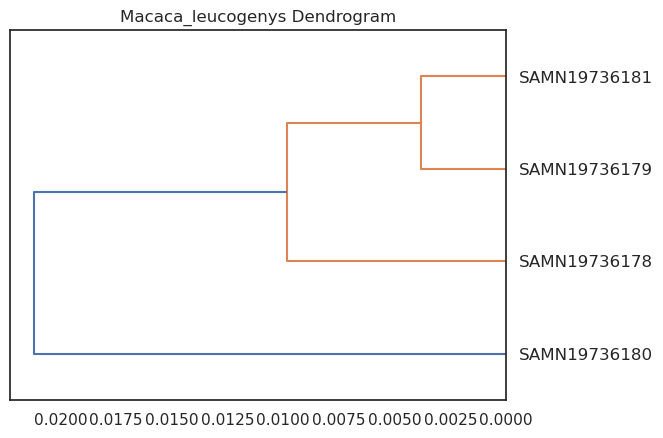

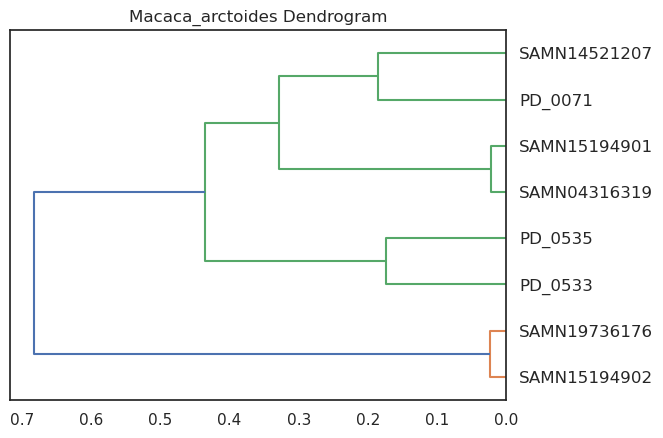

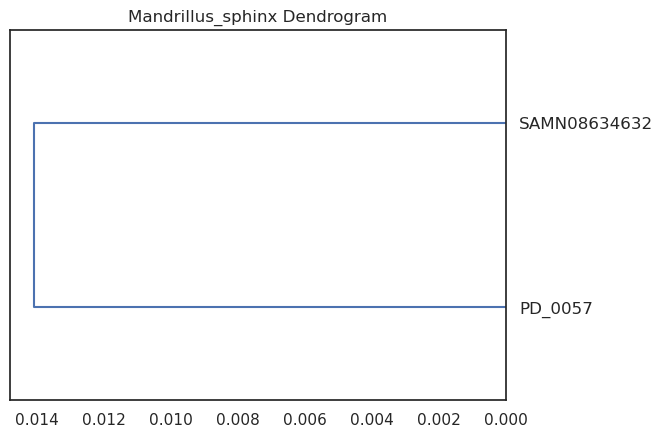

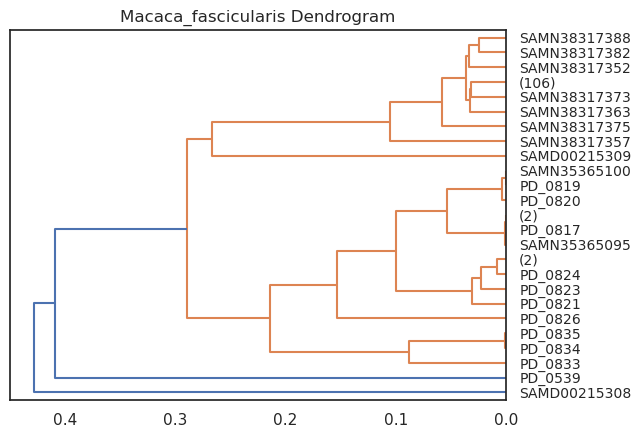

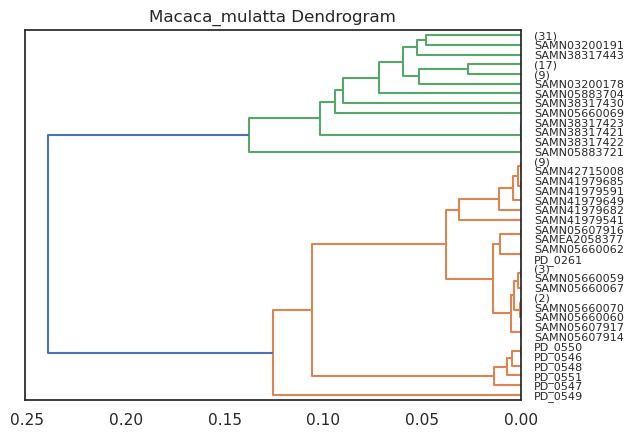

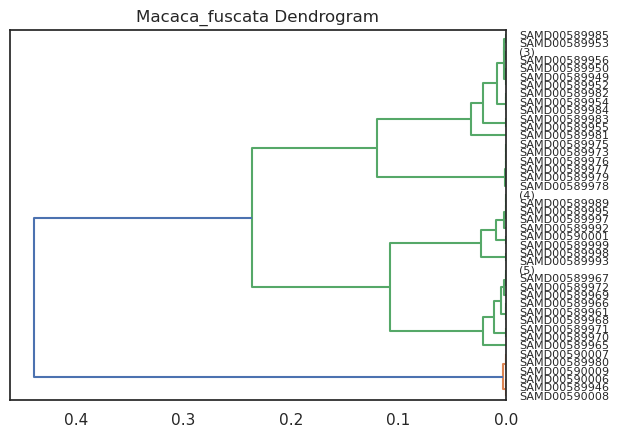

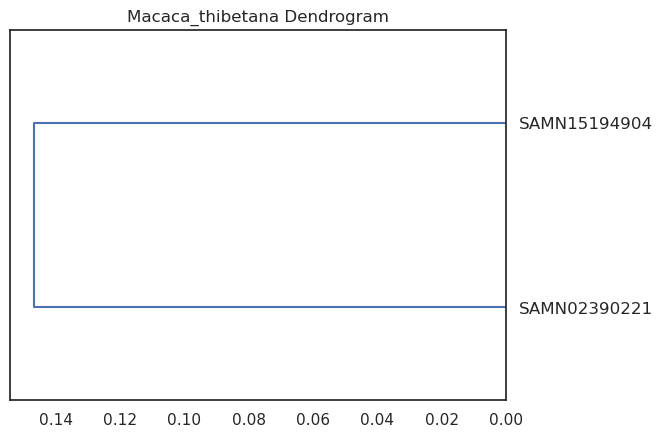

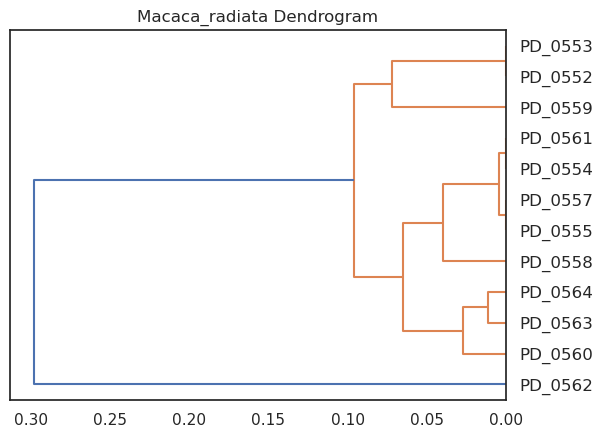

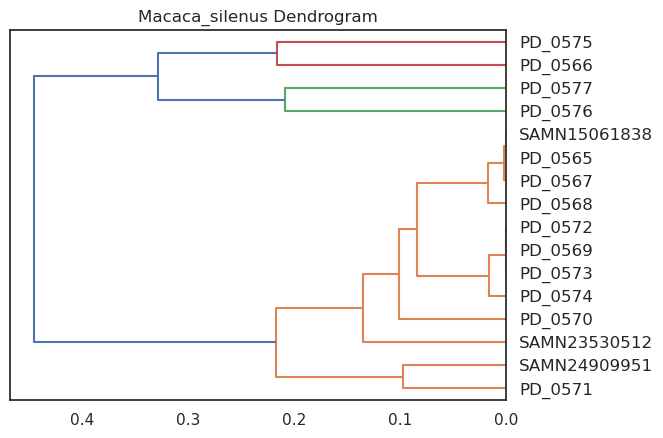

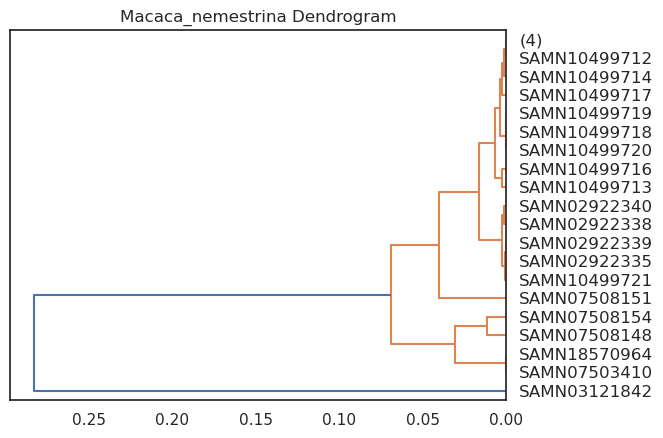

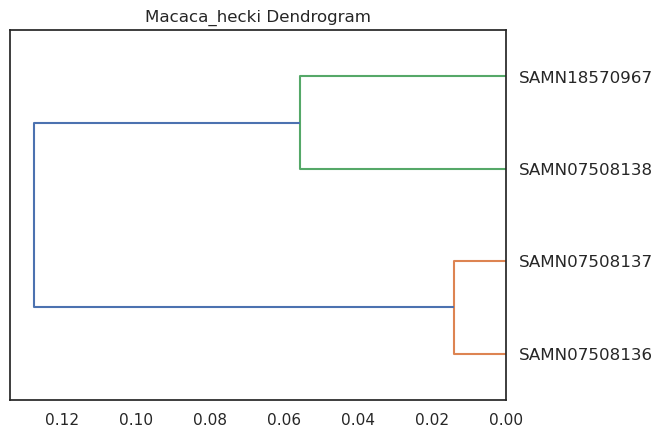

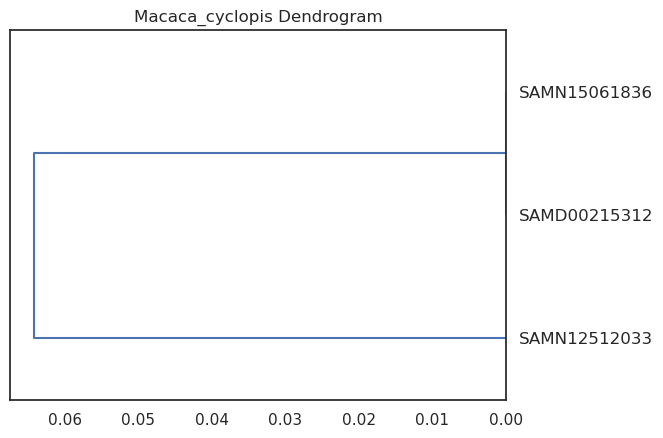

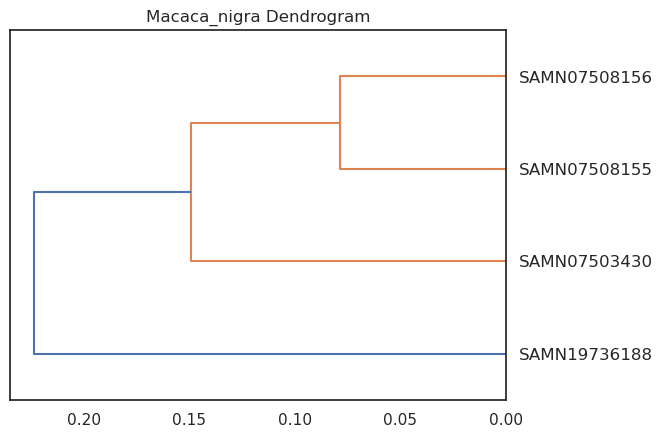

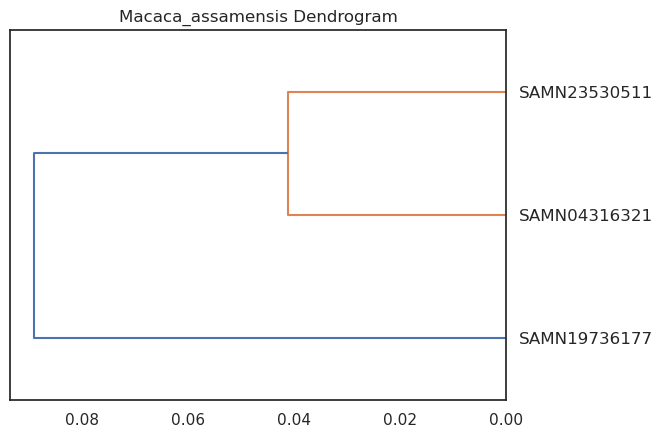

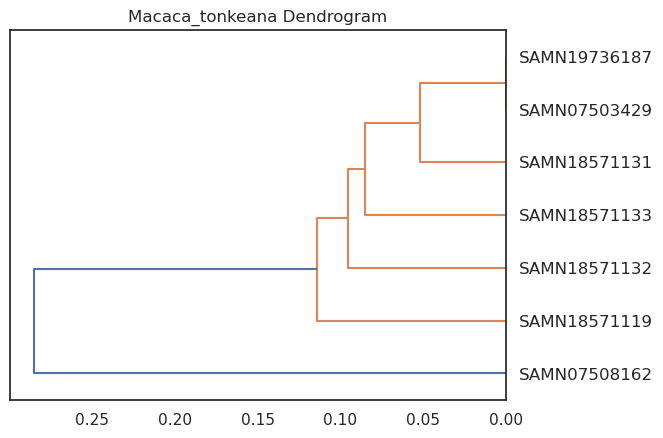

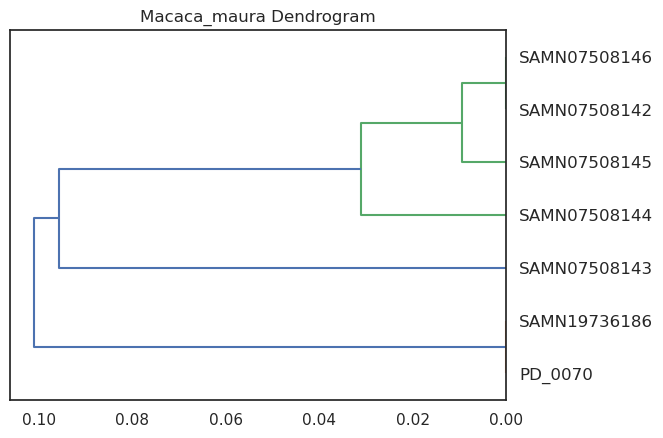

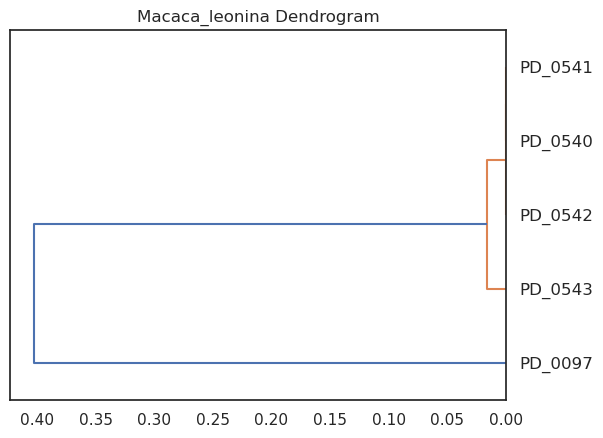

<Figure size 640x480 with 0 Axes>

In [11]:
for p in glob.glob("../results/window_stats_20x_inds/Ma*0.1cutoff_fst*"):
    aut_fst = pd.read_csv(p, sep="\t")
    model = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None, metric="precomputed", linkage="average")
    model = model.fit(aut_fst.clip(0))
    plt.title("{} Dendrogram".format(p.split("/")[-1].split("_ssp_")[0]))
    plot_dendrogram(model, truncate_mode="level", p=8)
    plt.figure()

In [55]:
short_form = p.split("/")[-1].split("_")[1]
long_form = p.split("/")[-1].split("_100kb")[0]
short_form, long_form

('lagotricha', 'Lagothrix_lagotricha_ssp')

In [68]:
sub_vasili.loc[sub_vasili.species == species]

ID       ID_PGDP group     family   genus   species  \
116        PD_0075       PD_0075   PLA   Atelidae  Ateles  paniscus   
117        PD_0304       PD_0304   PLA   Atelidae  Ateles  paniscus   
1729  SAMN01920505  SAMN01920505   APE  Hominidae     Pan  paniscus   
1730  SAMN01920506  SAMN01920506   APE  Hominidae     Pan  paniscus   
1731  SAMN01920507  SAMN01920507   APE  Hominidae     Pan  paniscus   
1732  SAMN01920508  SAMN01920508   APE  Hominidae     Pan  paniscus   
1733  SAMN01920509  SAMN01920509   APE  Hominidae     Pan  paniscus   
1734  SAMN01920510  SAMN01920510   APE  Hominidae     Pan  paniscus   
1735  SAMN01920511  SAMN01920511   APE  Hominidae     Pan  paniscus   
1736  SAMN01920512  SAMN01920512   APE  Hominidae     Pan  paniscus   
1737  SAMN01920513  SAMN01920513   APE  Hominidae     Pan  paniscus   
1738  SAMN01920514  SAMN01920514   APE  Hominidae     Pan  paniscus   
1739  SAMN01920515  SAMN01920515   APE  Hominidae     Pan  paniscus   
1740  SAMN01920516  SAMN01920516   APE  Hominidae     Pan  paniscus   
1741  SAMN11123633  SAMN11123633   APE  Hominidae     Pan  paniscus   
1744  SAMN35877942  SAMN35877942   APE  Hominidae     Pan  paniscus   
1745  SAMN35877943  SAMN35877943   APE  Hominidae     Pan  paniscus   

     subspecies         species_full   species_short   species_genotyping  \
116         ssp  Ateles_paniscus_ssp  A.paniscus_ssp  Ateles_paniscus_ssp   
117         ssp  Ateles_paniscus_ssp  A.paniscus_ssp  Ateles_paniscus_ssp   
1729        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1730        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1731        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1732        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1733        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1734        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1735        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1736        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1737        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1738        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1739        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1740        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1741        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1744        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   
1745        ssp     Pan_paniscus_ssp  P.paniscus_ssp     Pan_paniscus_ssp   

      ... reason finalQC  Kuderna_AB_QC  Kuderna_COV_QC     relatives  \
116   ...    NaN    warn            NaN             NaN           NaN   
117   ...    NaN    warn            NaN             NaN           NaN   
1729  ...    NaN      ok            NaN             NaN           NaN   
1730  ...    NaN      ok            NaN             NaN           NaN   
1731  ...    NaN      ok            NaN             NaN           NaN   
1732  ...    NaN      ok            NaN             NaN           NaN   
1733  ...    NaN      ok           WARN            PASS           NaN   
1734  ...    NaN      ok            NaN             NaN           NaN   
1735  ...    NaN      ok            NaN             NaN           NaN   
1736  ...    NaN      ok            NaN             NaN           NaN   
1737  ...    NaN      ok            NaN             NaN           NaN   
1738  ...    NaN      ok            NaN             NaN           NaN   
1739  ...    NaN      ok            NaN             NaN           NaN   
1740  ...    NaN      ok            NaN             NaN           NaN   
1741  ...    NaN      ok            NaN             NaN  SAMN13935689   
1744  ...    NaN      ok            NaN             NaN  SAMN13935689   
1745  ...    NaN      ok            NaN             NaN  SAMN13935689   

      remove_as_relative  generatio

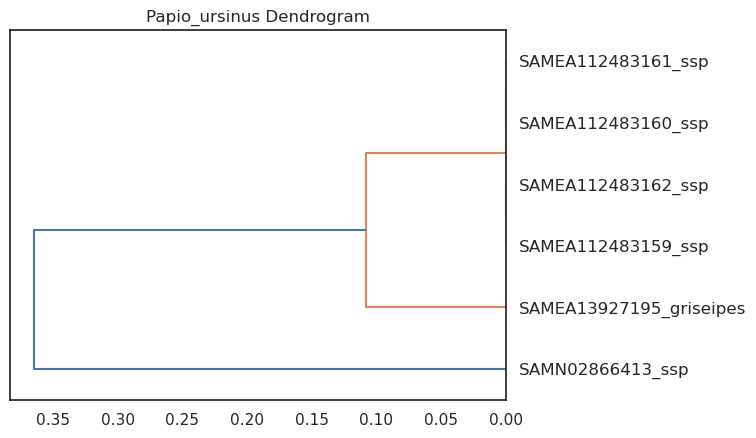

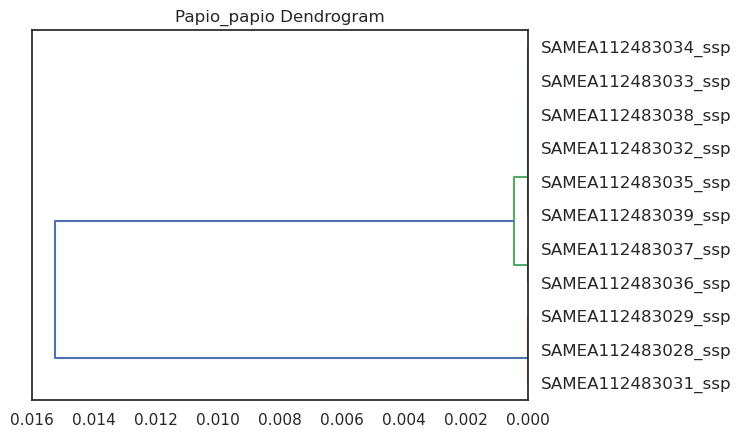

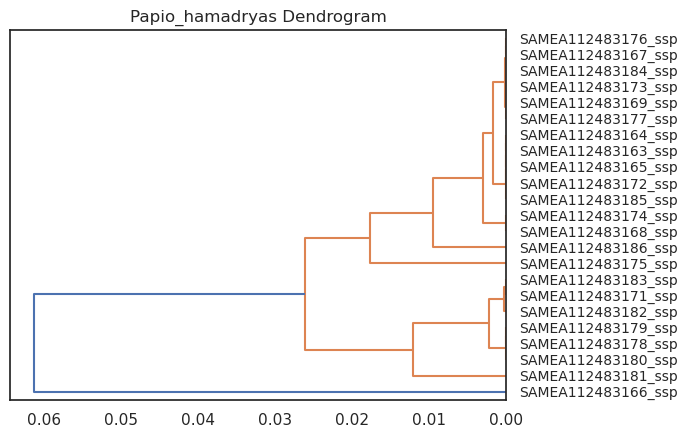

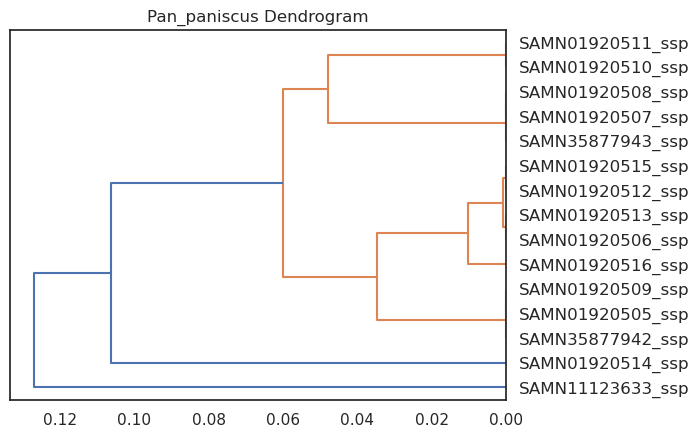

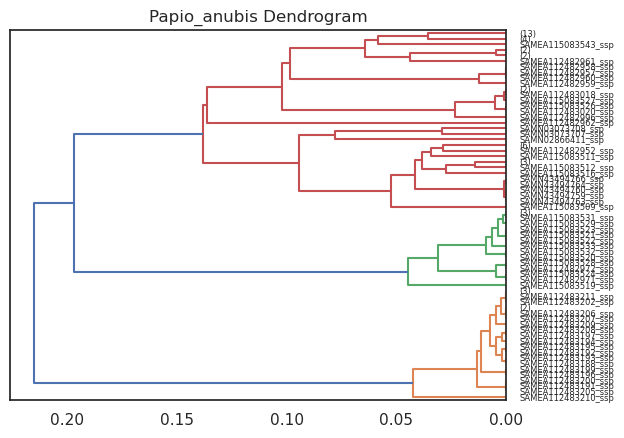

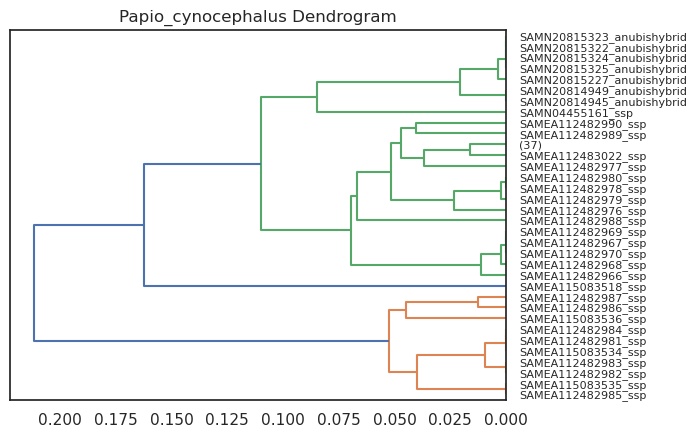

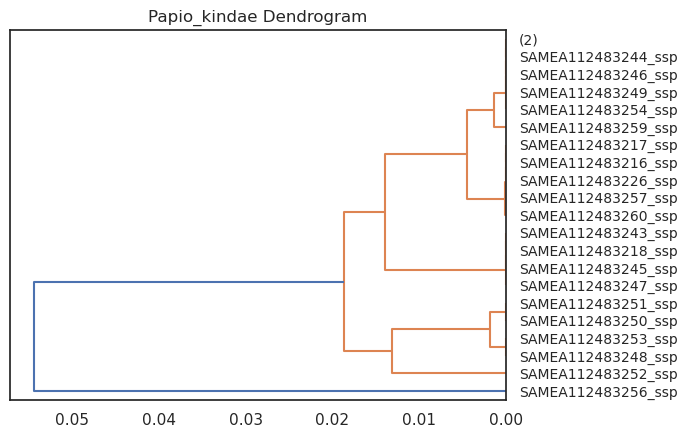

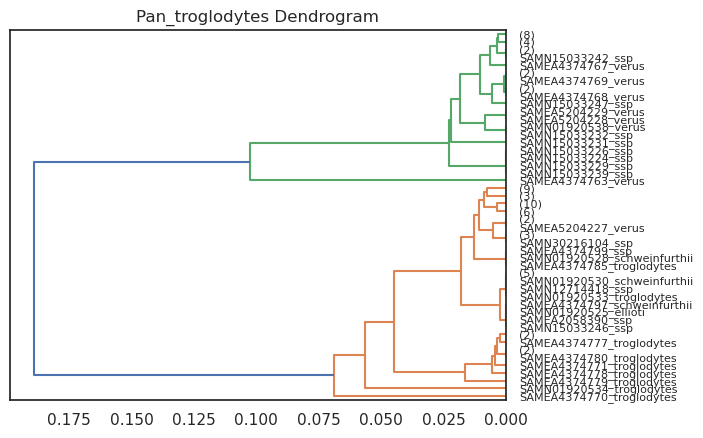

<Figure size 640x480 with 0 Axes>

In [69]:
for p in glob.glob("../results/window_stats_20x_inds/Pa*0.1cutoff_fst*"):
    species = p.split("/")[-1].split("_")[1]
    genus_vasili = sub_vasili.loc[sub_vasili.genus == p.split("/")[-1].split("_")[0]]
    ID_subspecies = genus_vasili.loc[genus_vasili.species == species].ID+"_"+genus_vasili.loc[genus_vasili.species == species].subspecies
    aut_fst = pd.read_csv(p, sep="\t")
    aut_fst.columns = ID_subspecies
    model = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None, metric="precomputed", linkage="average")
    model = model.fit(aut_fst.clip(0))
    plt.title("{} Dendrogram".format(p.split("/")[-1].split("_ssp_")[0]))
    plot_dendrogram(model, truncate_mode="level", p=8)
    plt.figure()

/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:2978: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([dvw, 0])
/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:2978: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([dvw, 0])
/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:2978: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([dvw, 0])
/tmp/20375116/ipykernel_258001/1569359522.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To contr

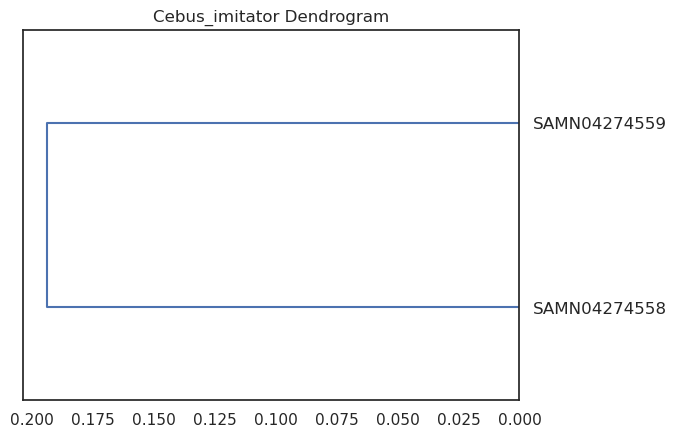

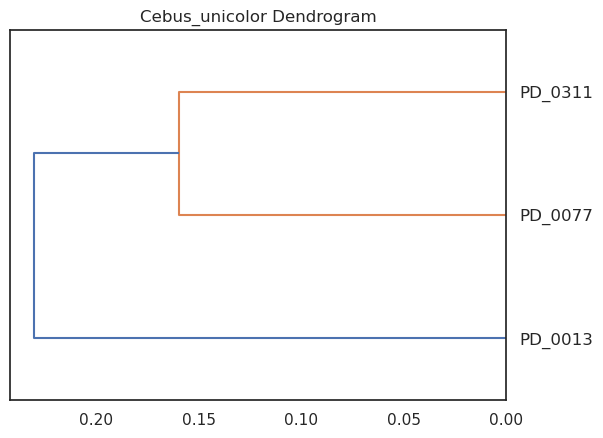

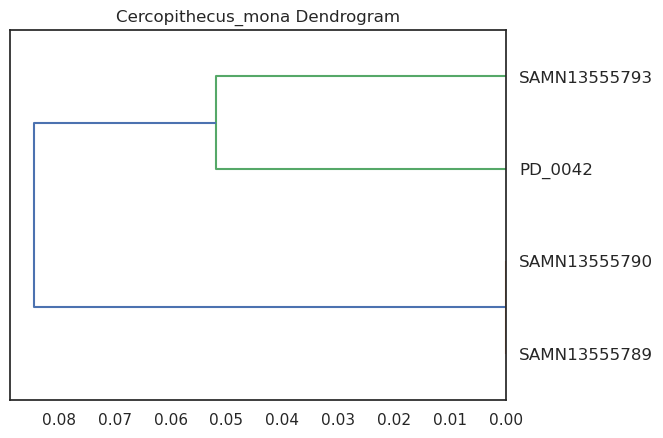

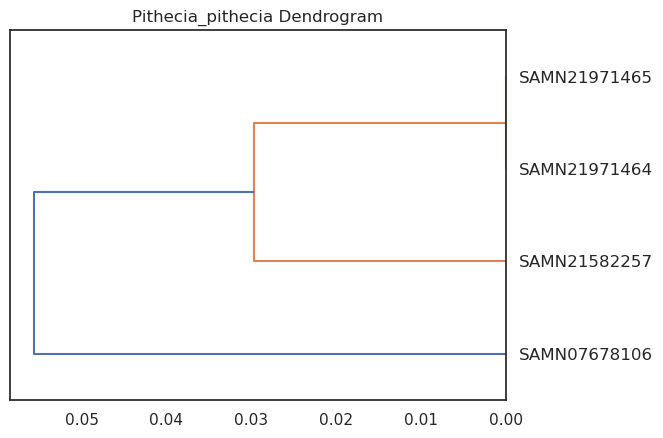

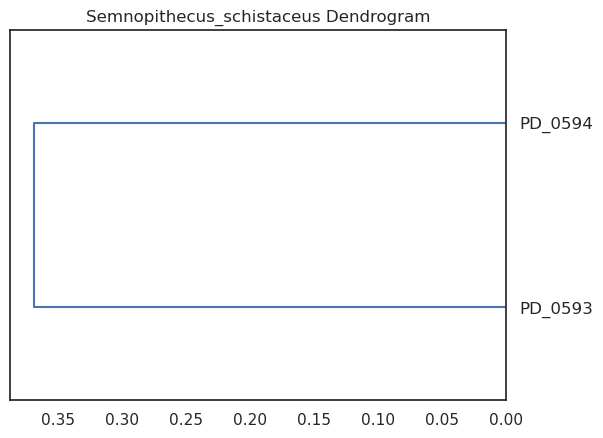

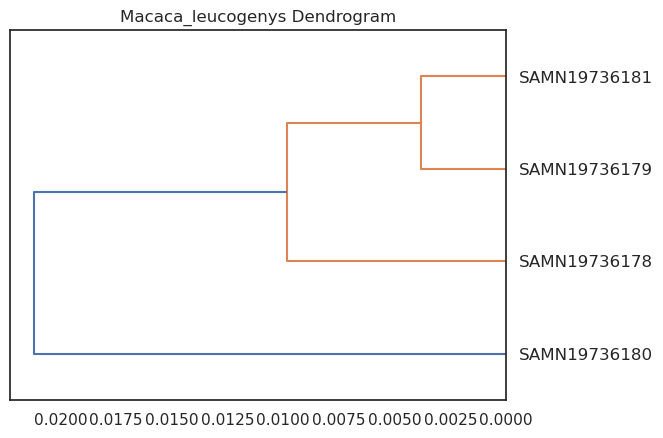

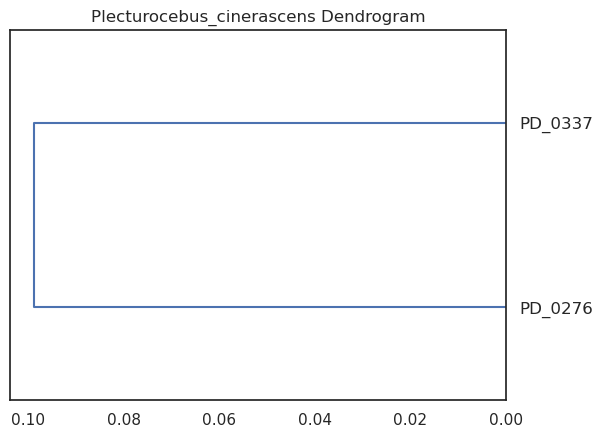

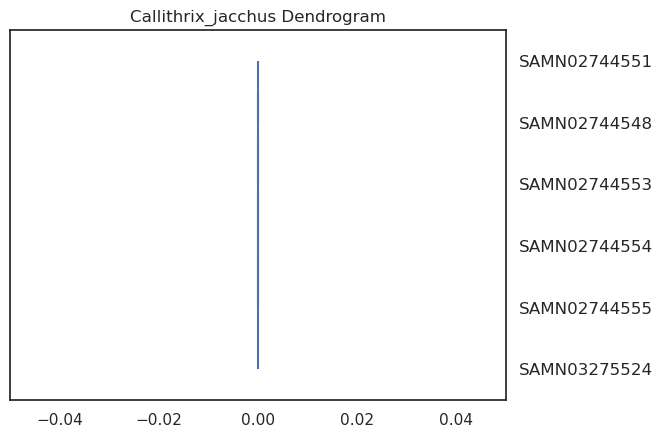

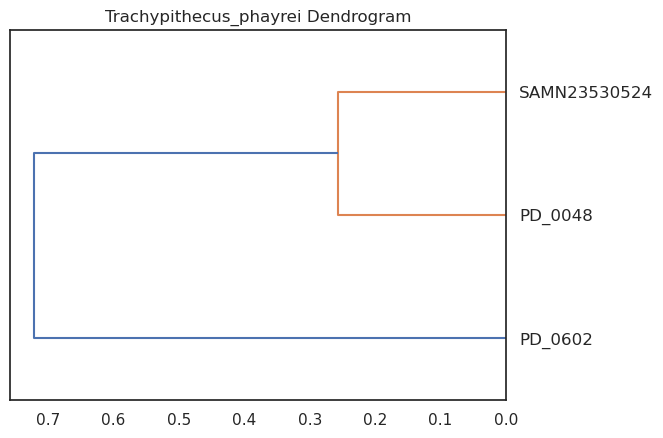

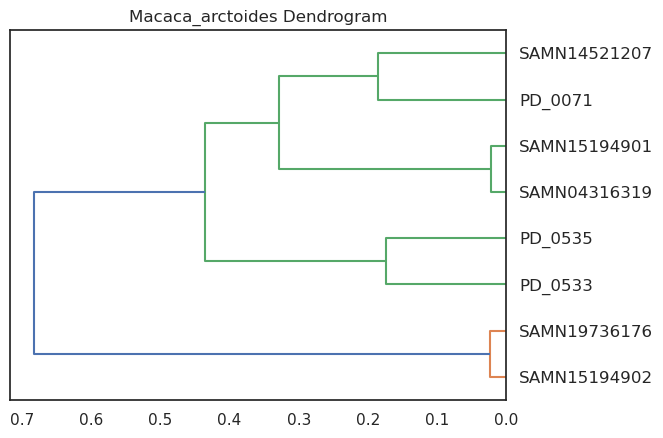

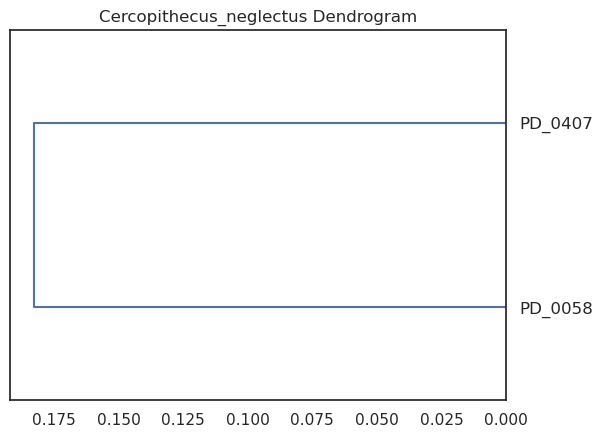

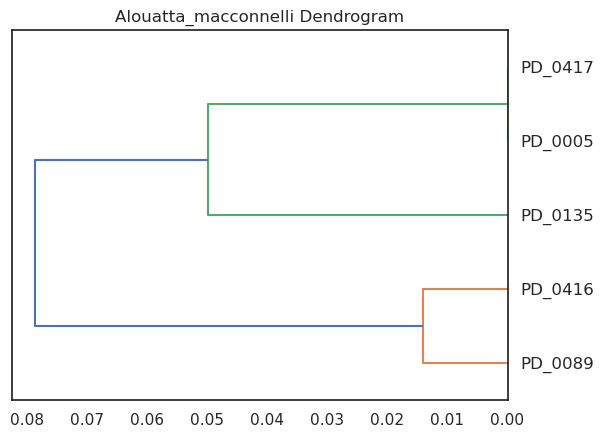

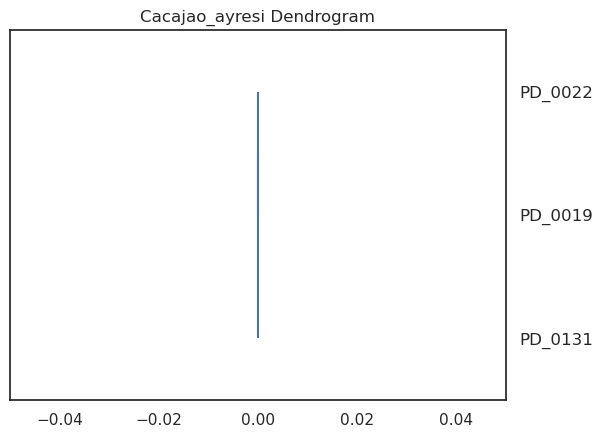

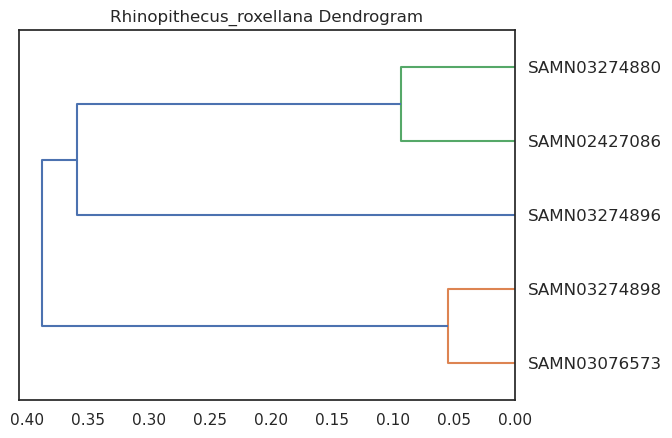

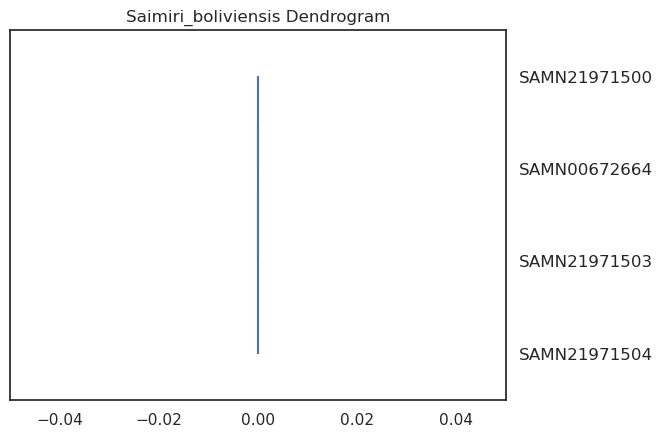

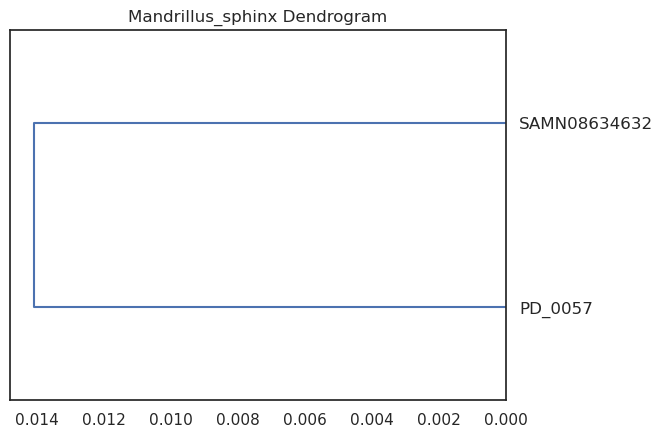

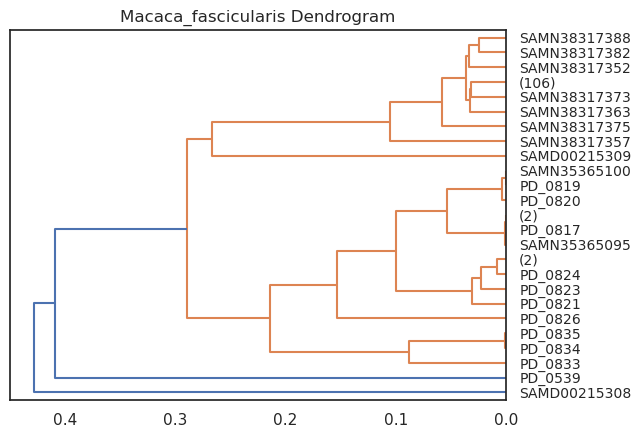

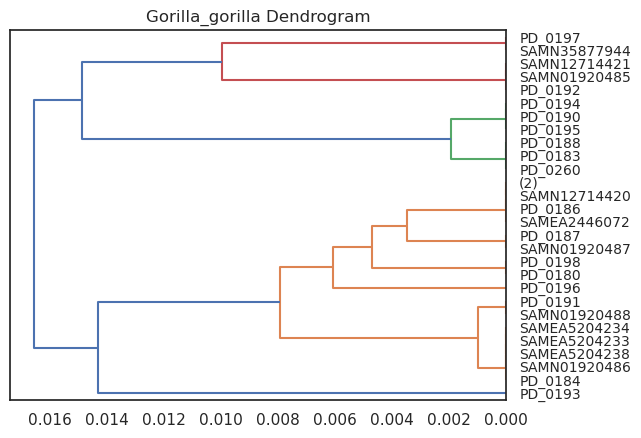

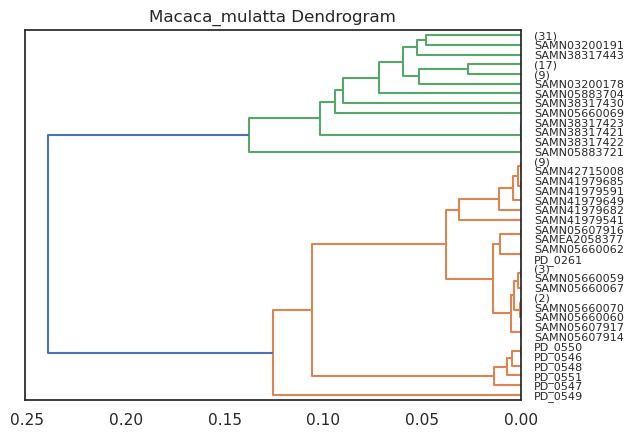

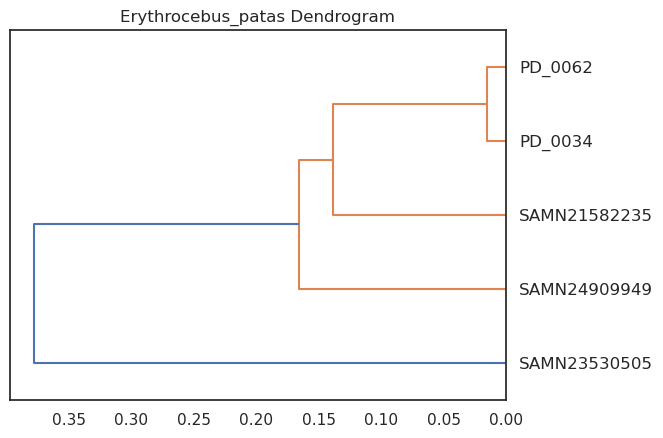

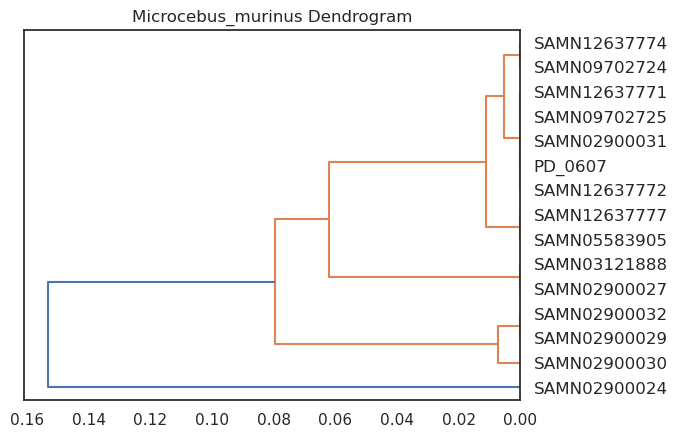

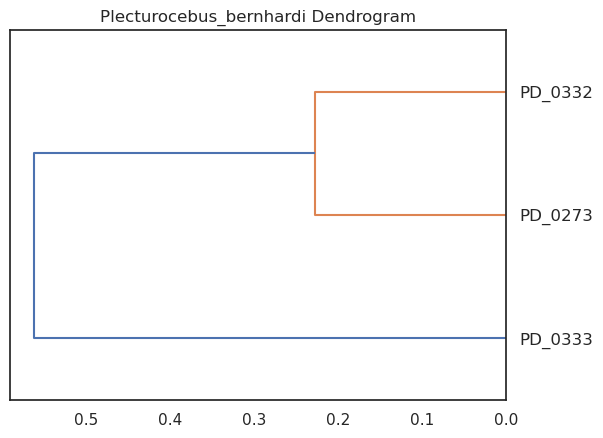

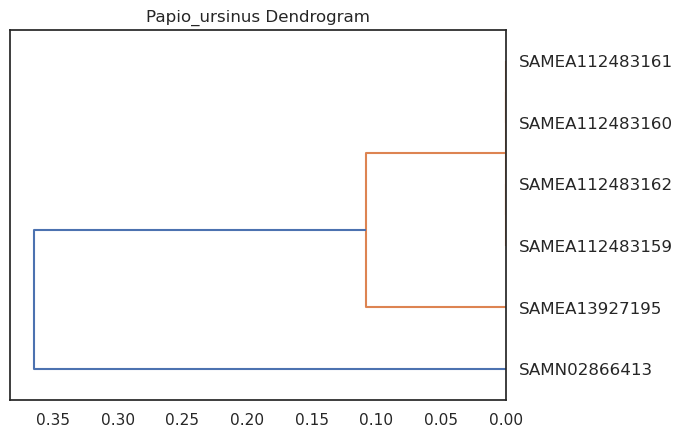

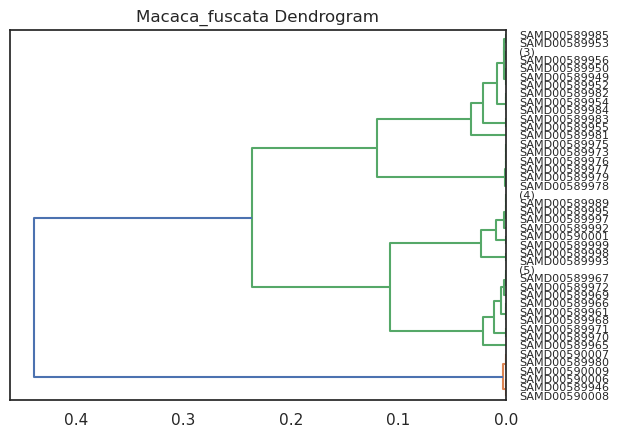

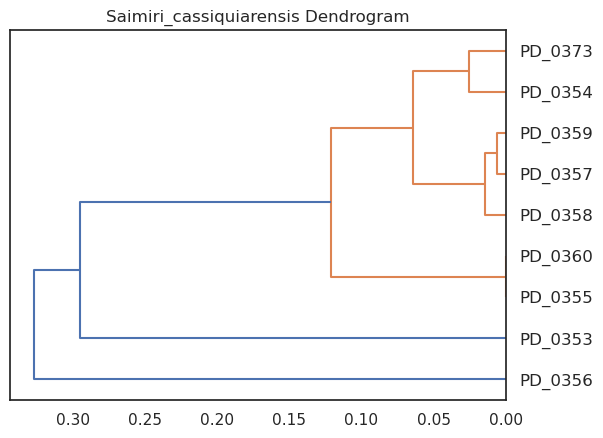

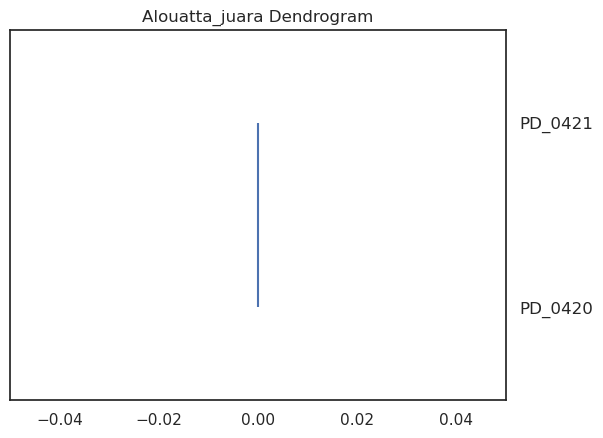

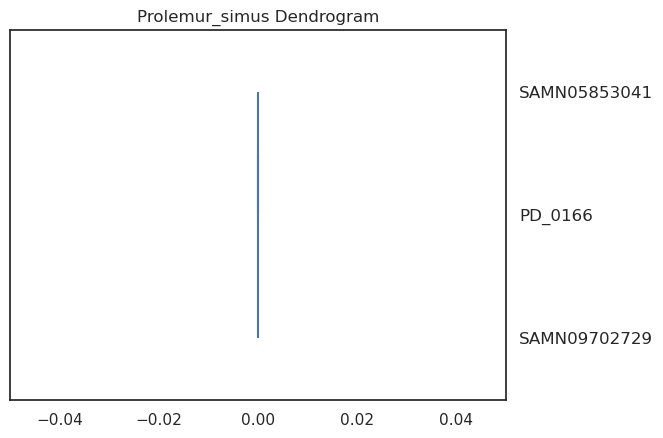

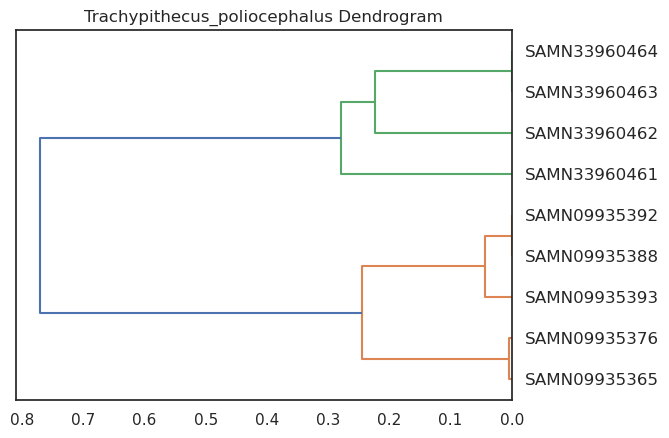

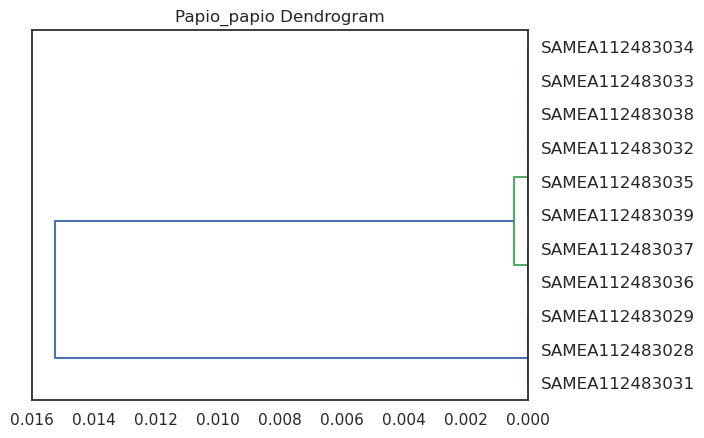

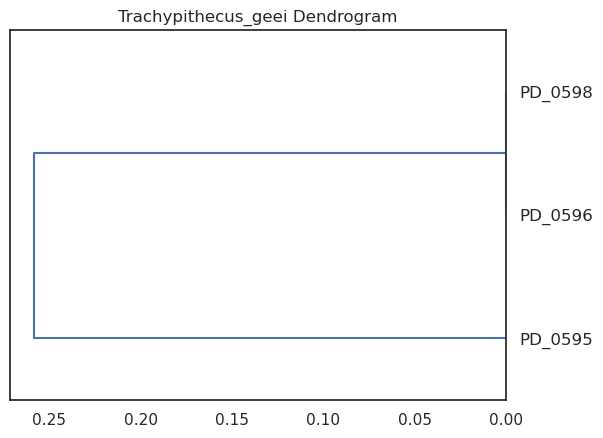

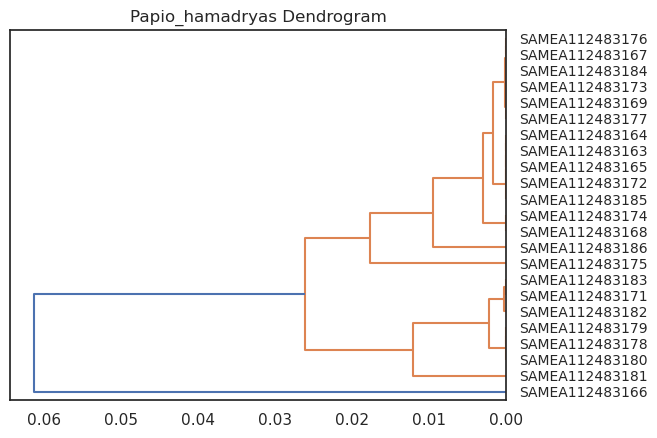

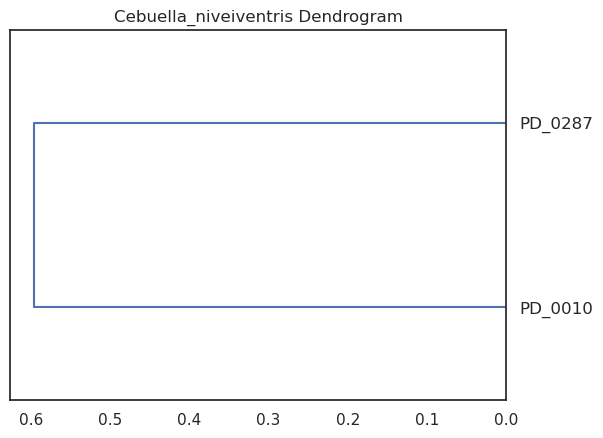

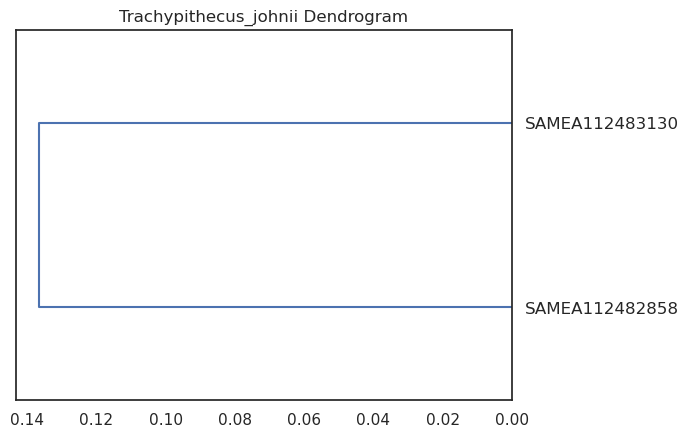

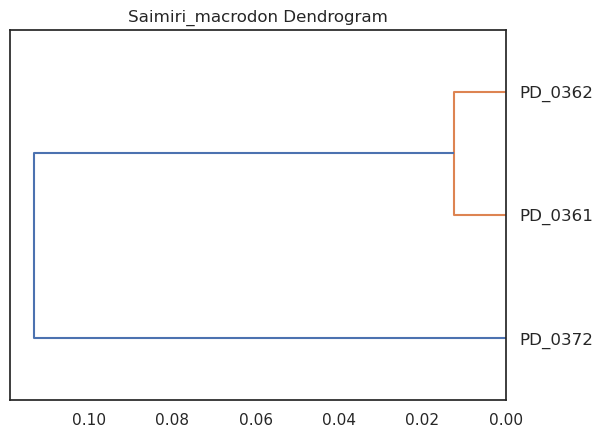

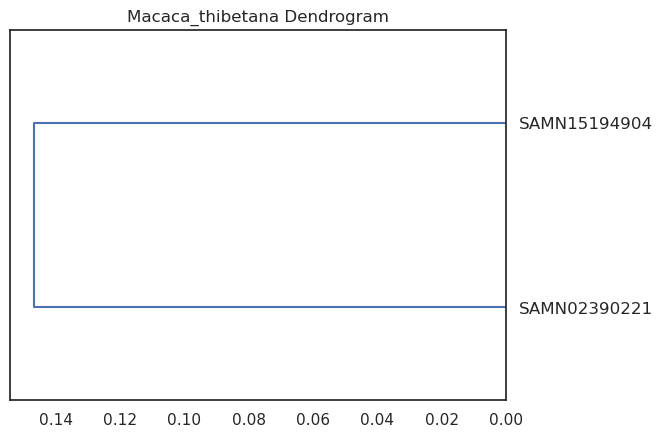

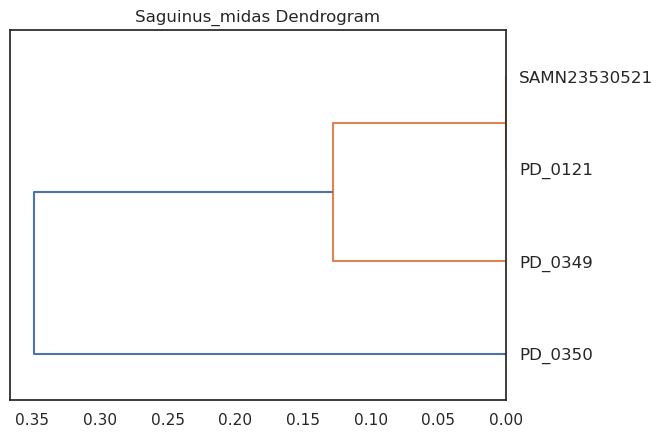

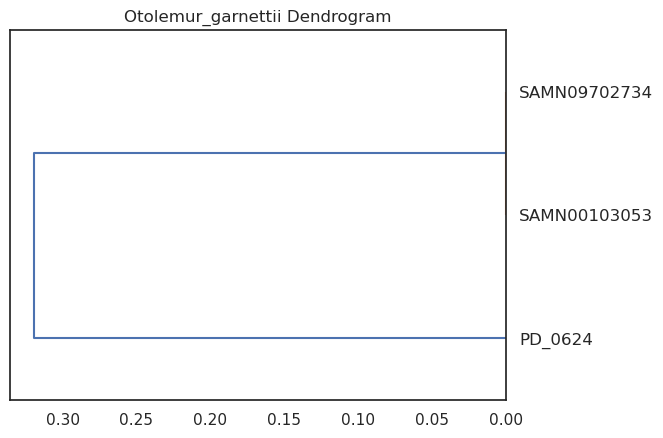

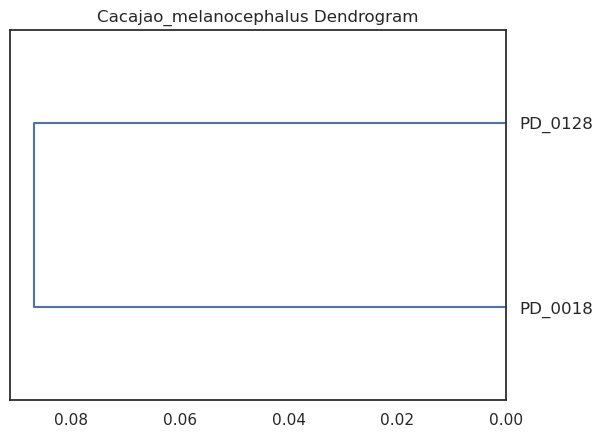

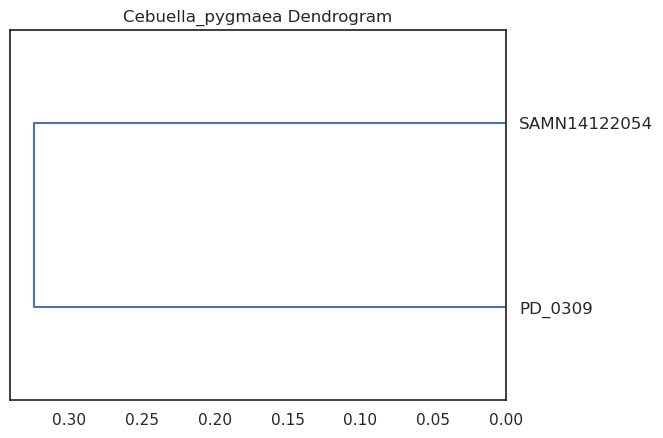

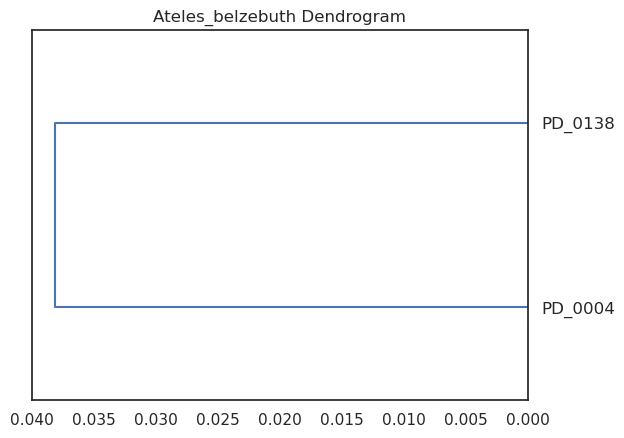

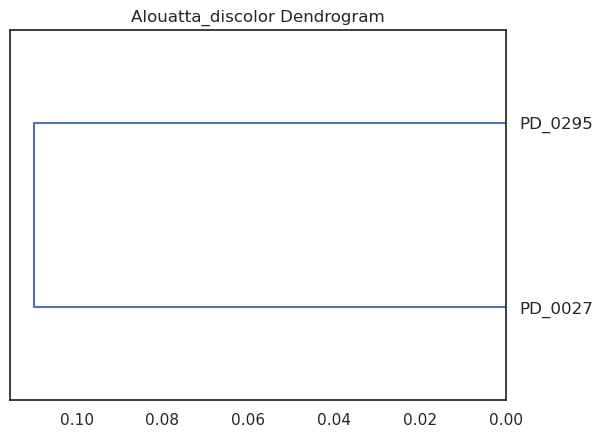

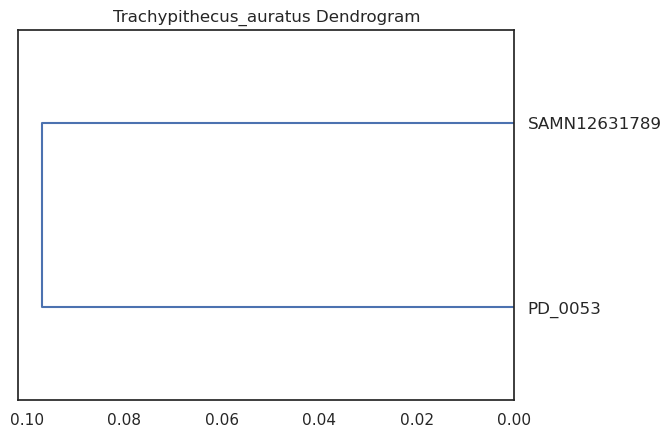

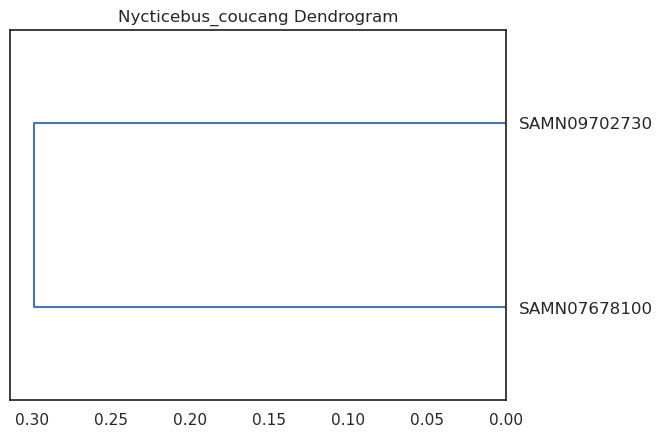

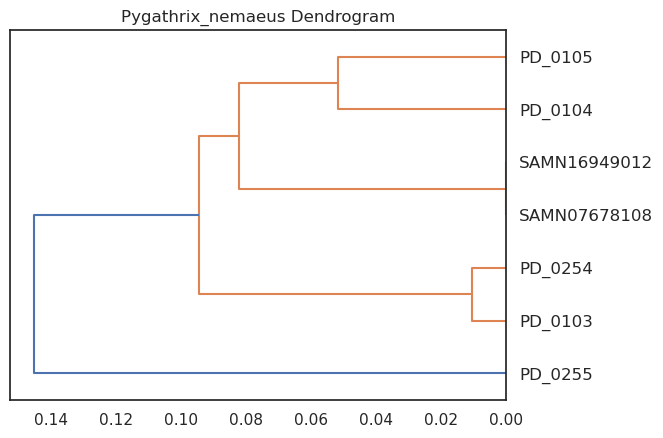

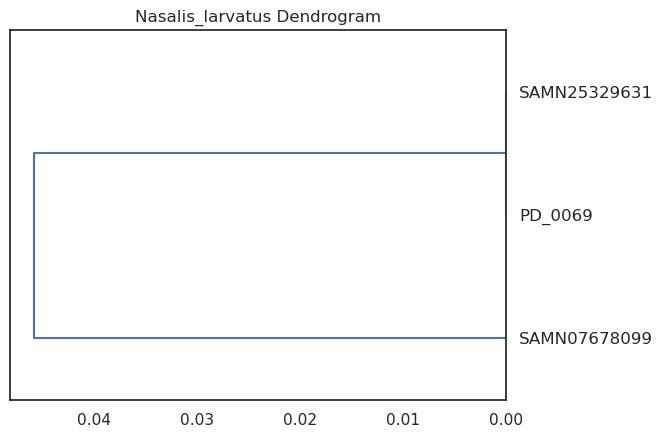

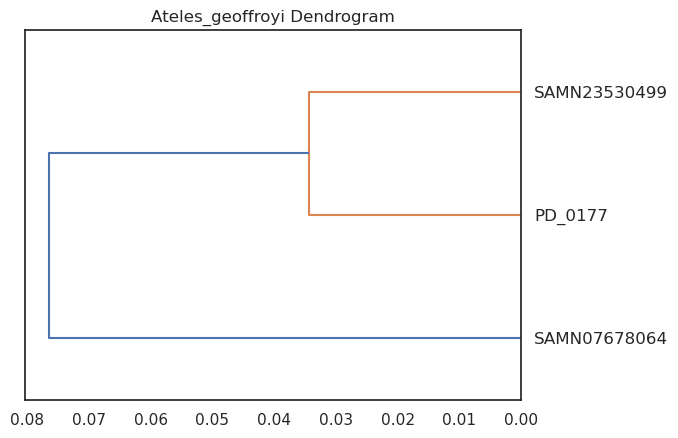

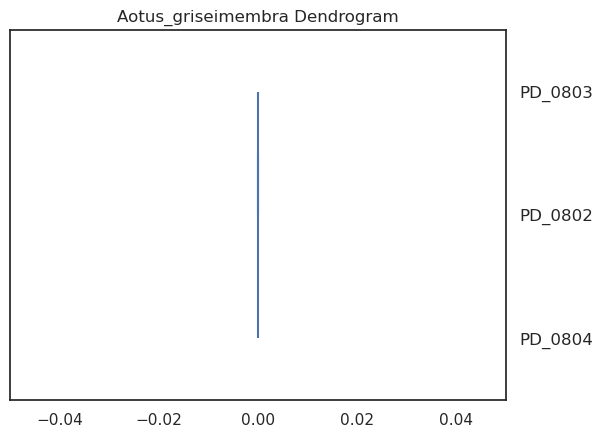

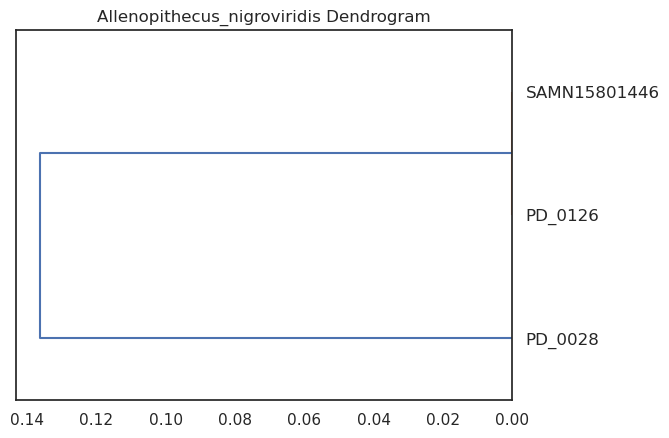

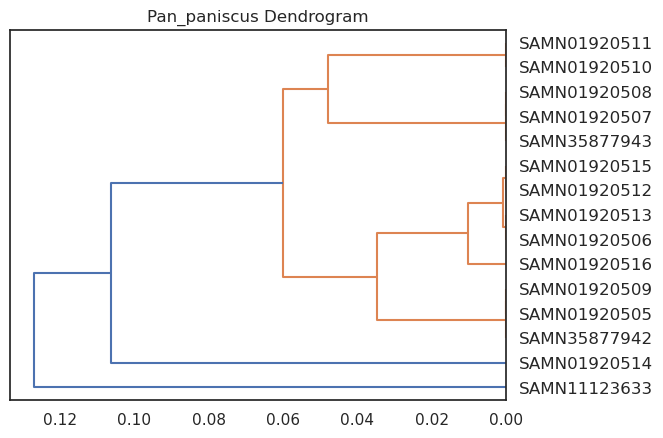

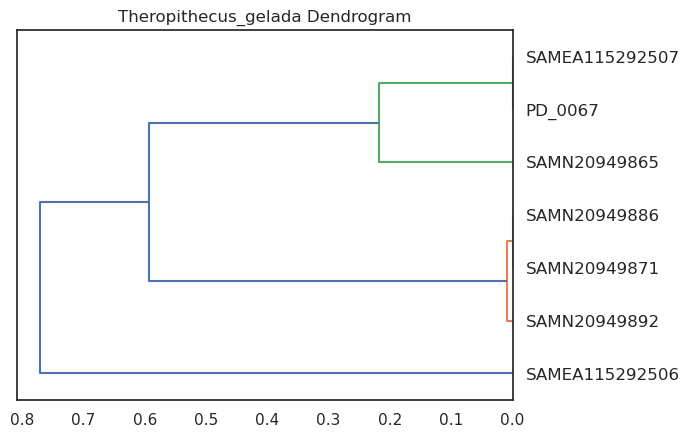

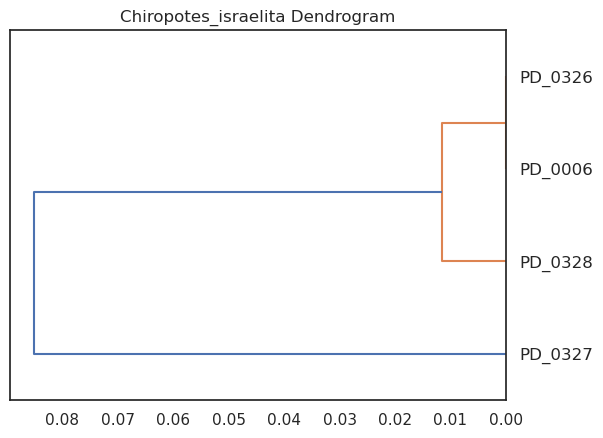

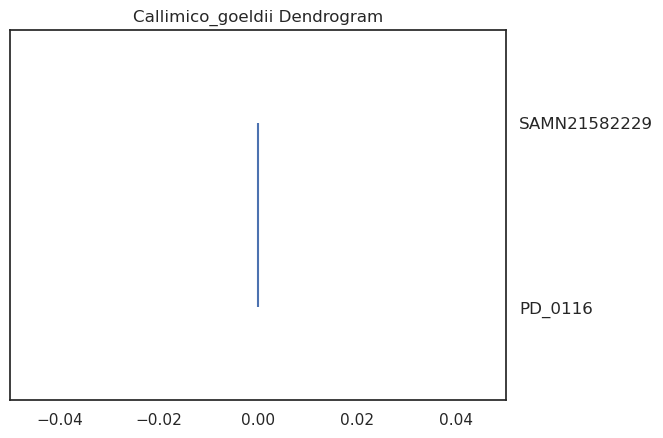

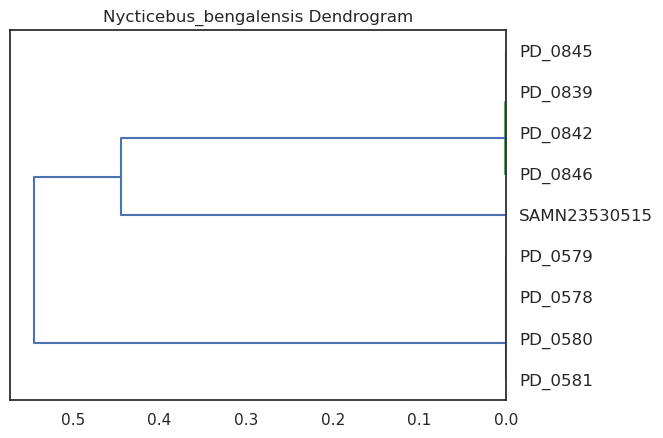

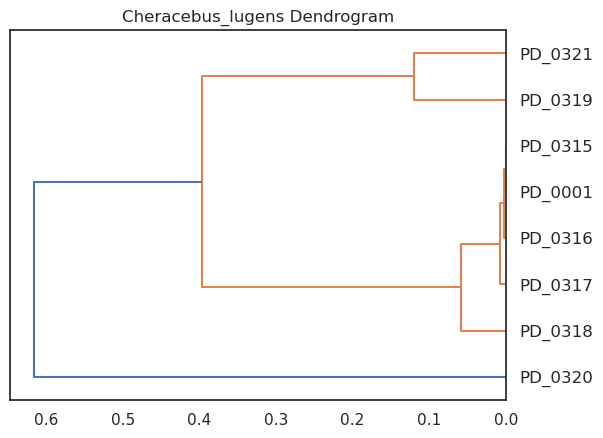

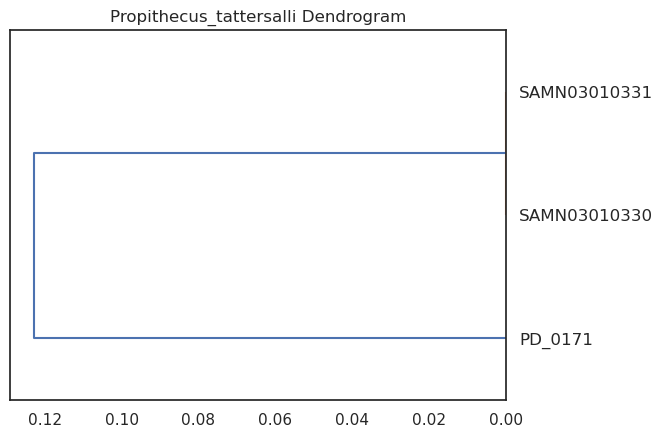

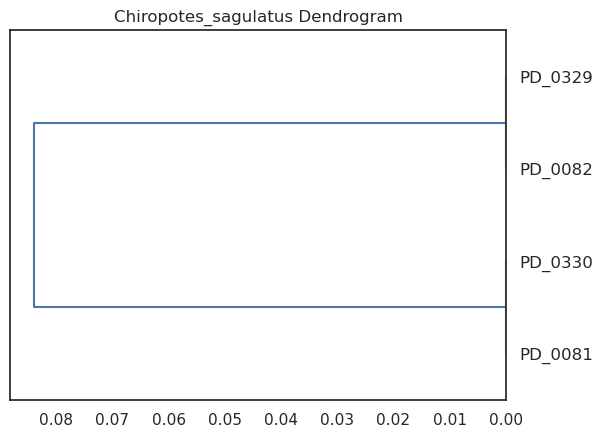

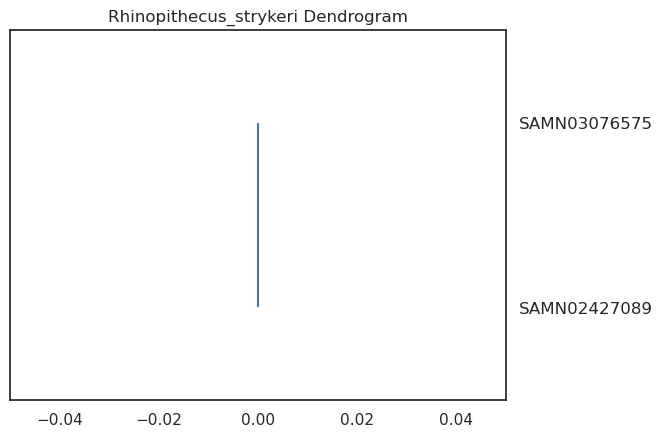

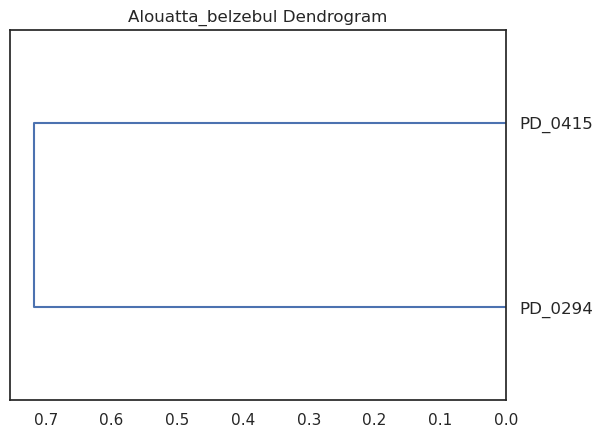

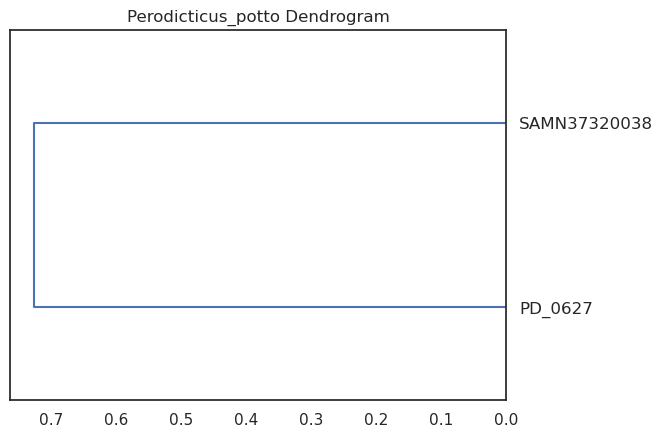

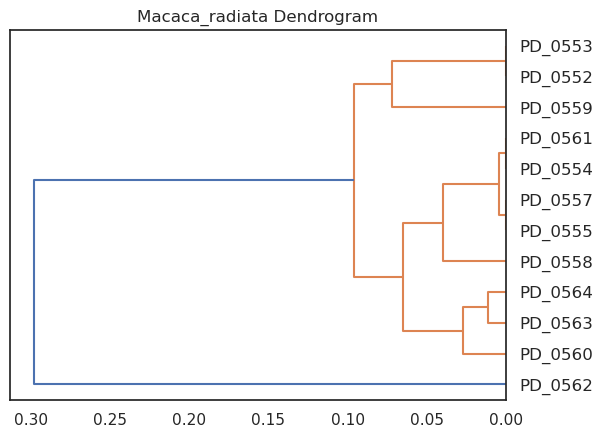

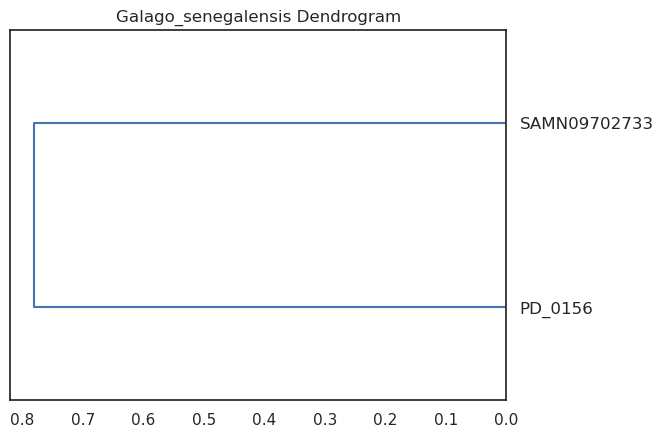

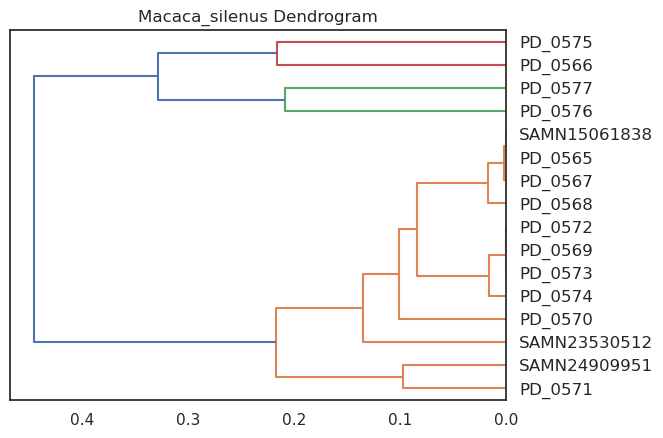

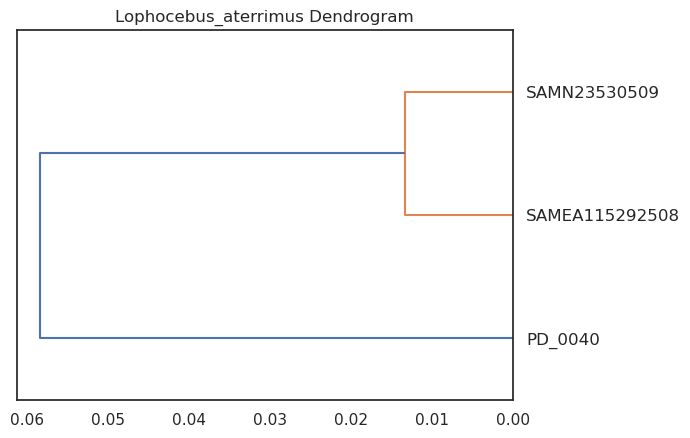

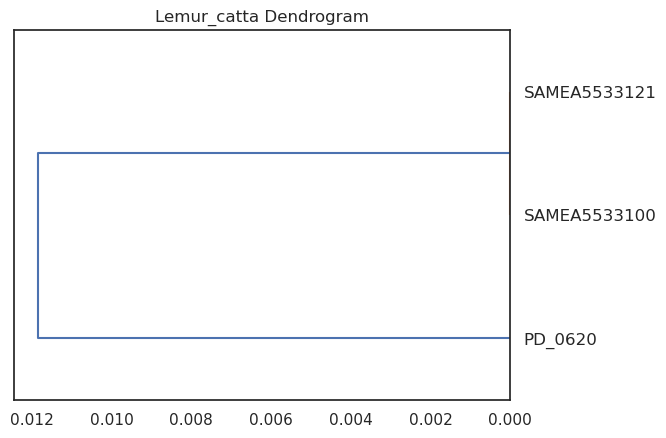

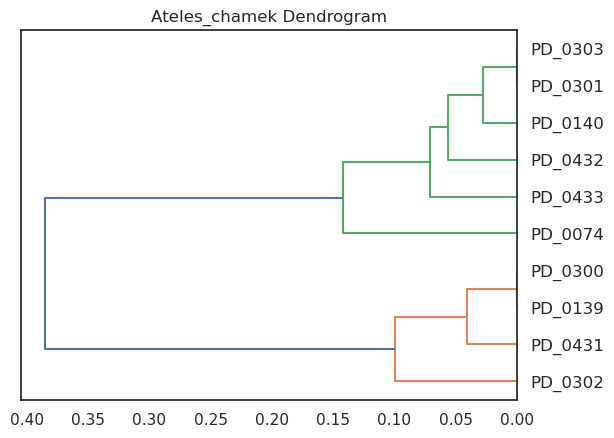

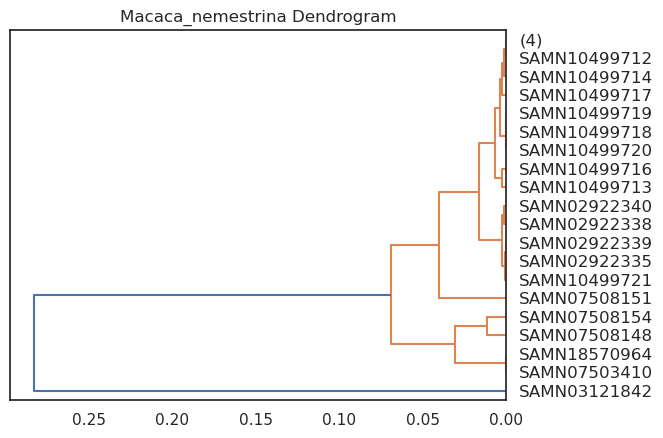

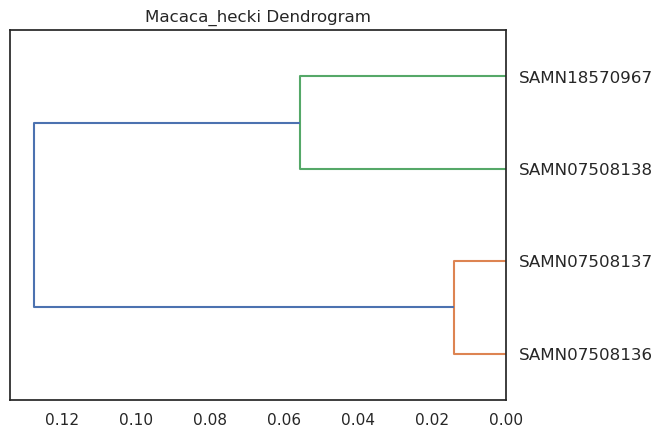

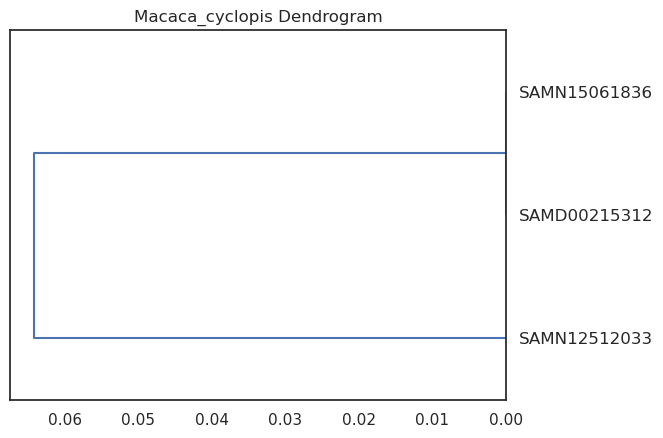

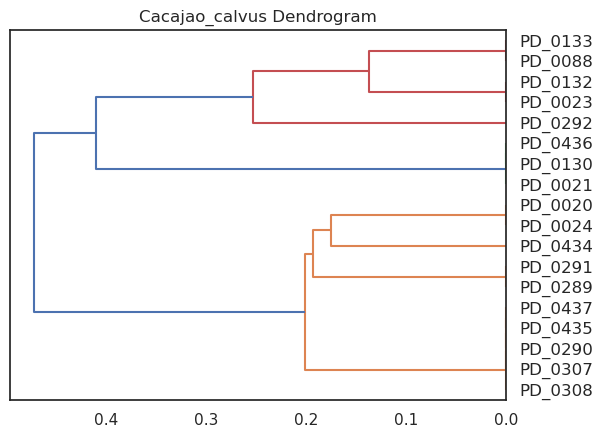

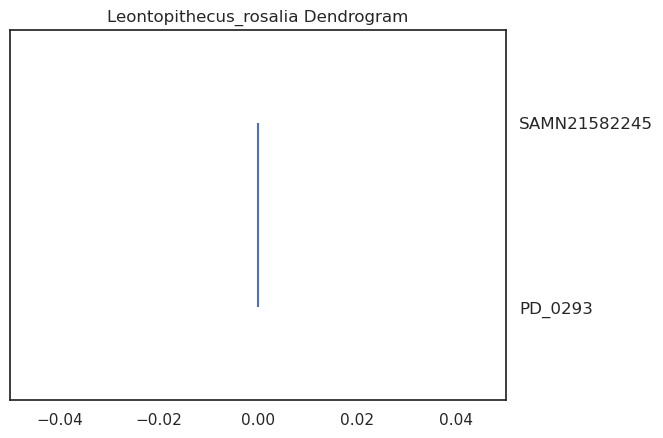

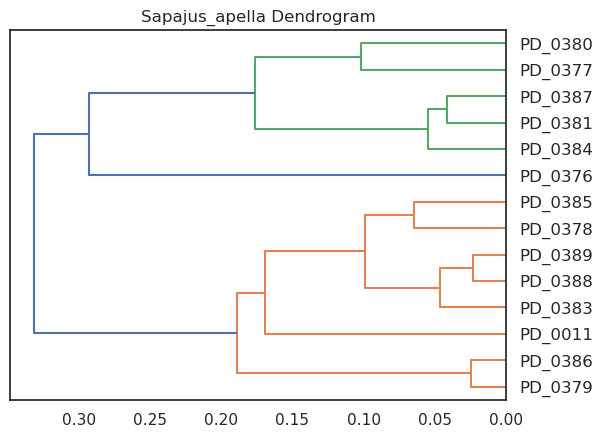

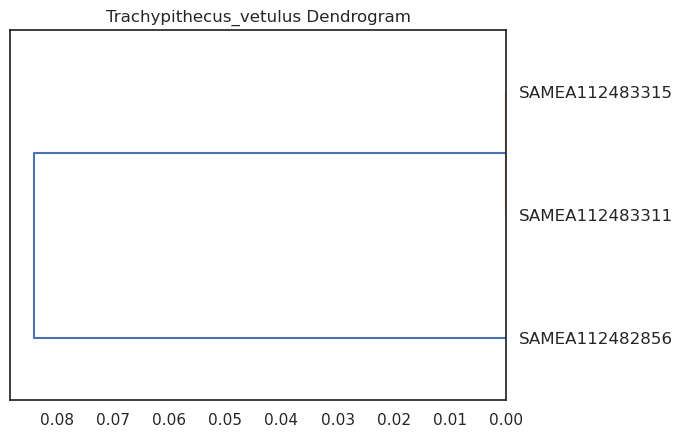

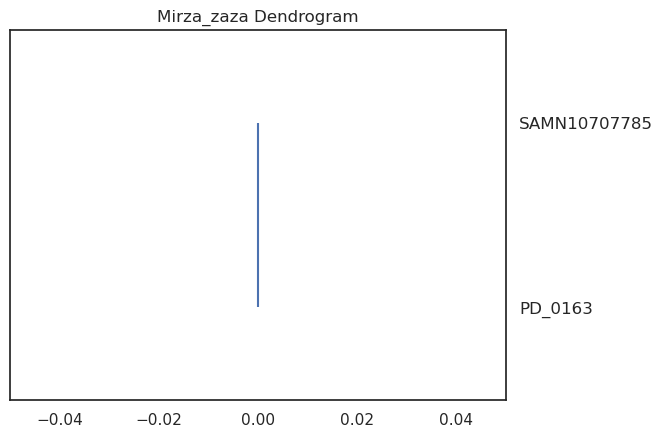

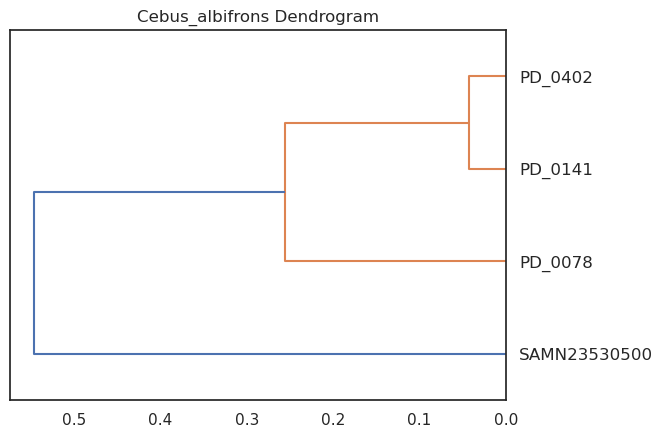

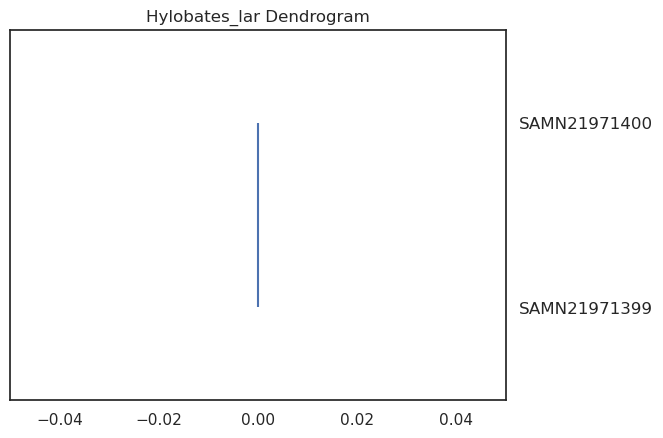

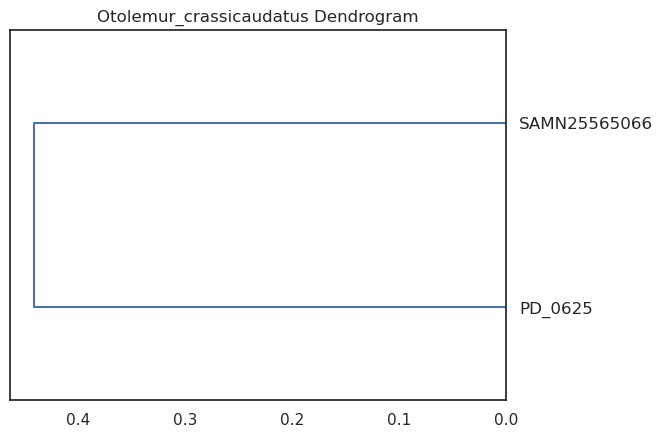

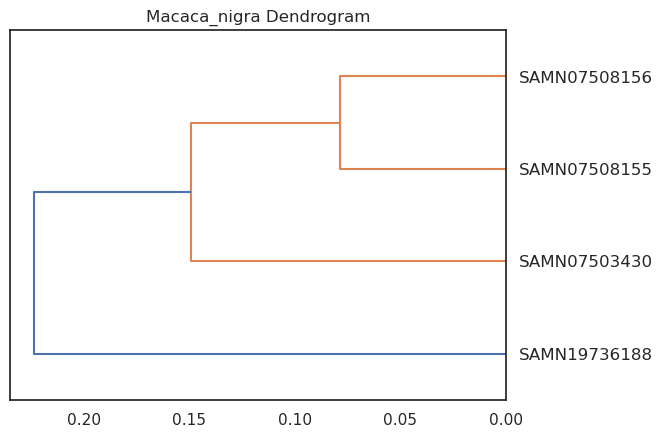

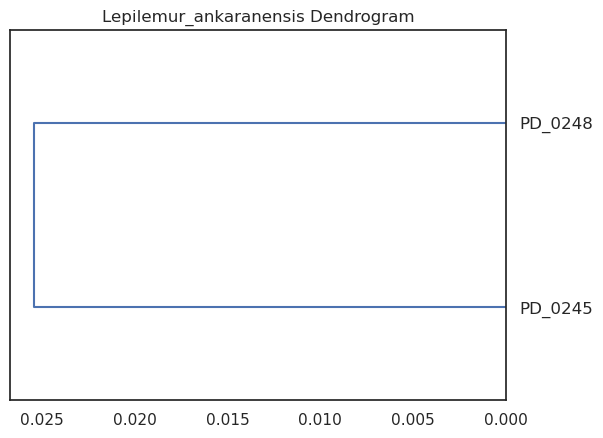

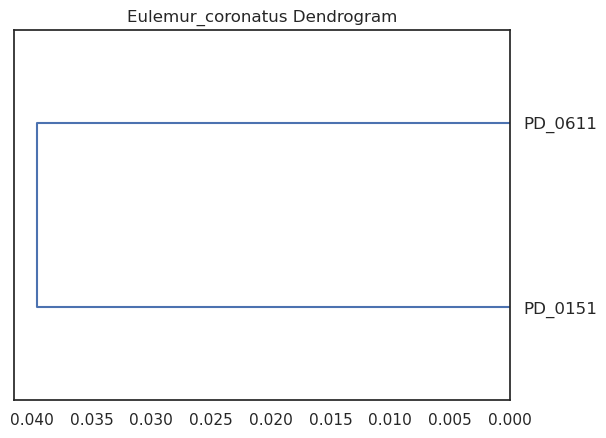

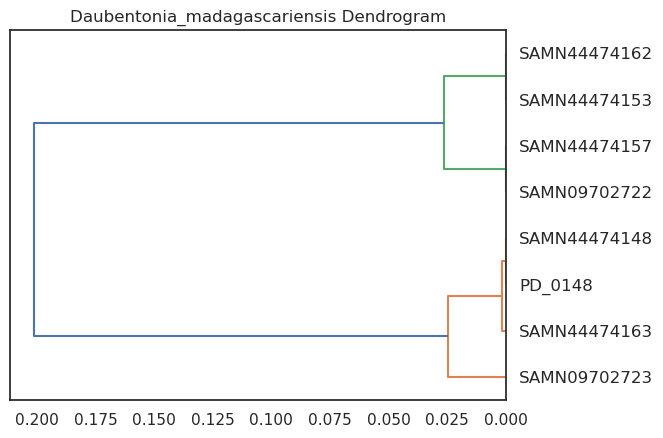

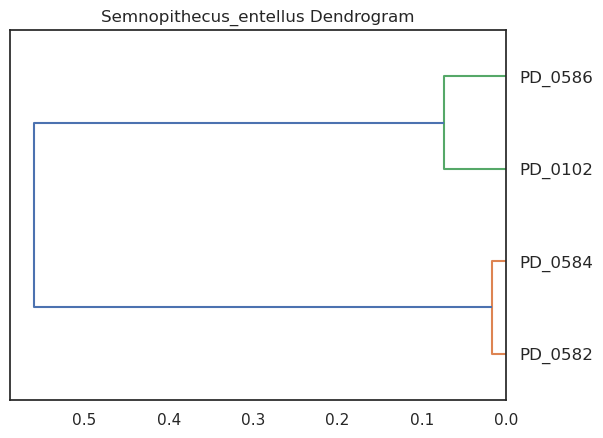

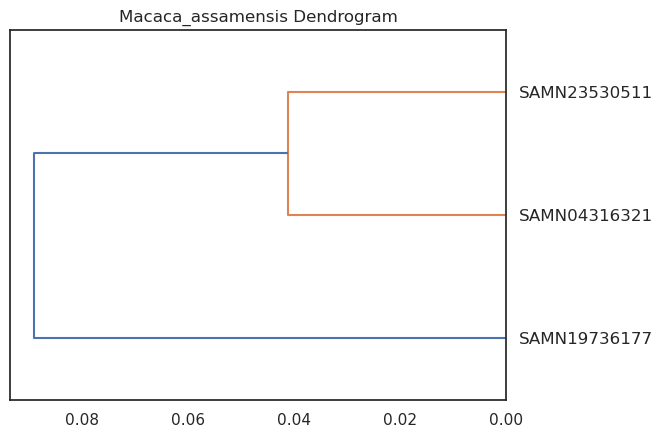

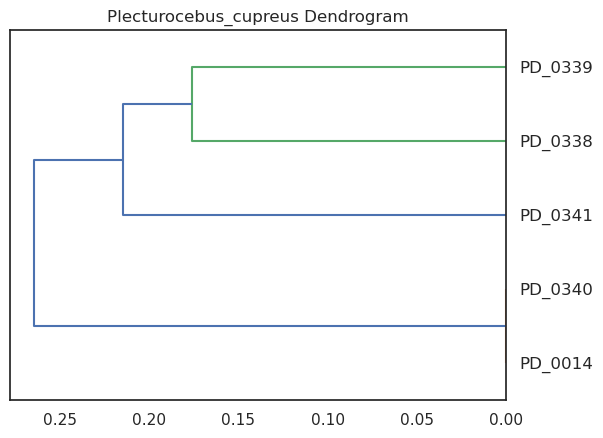

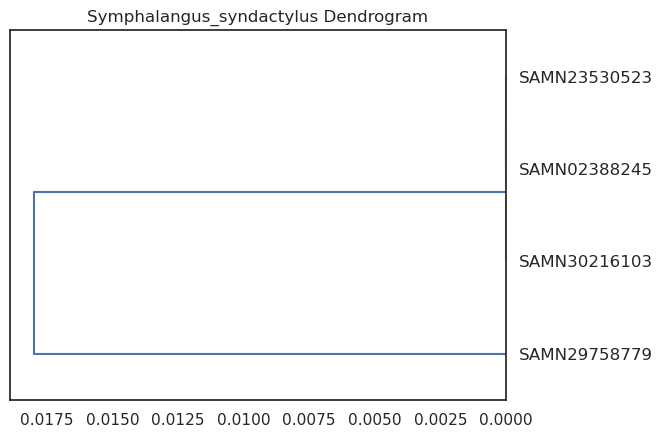

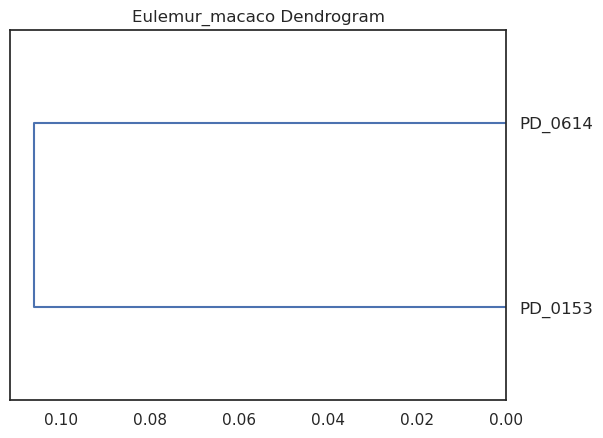

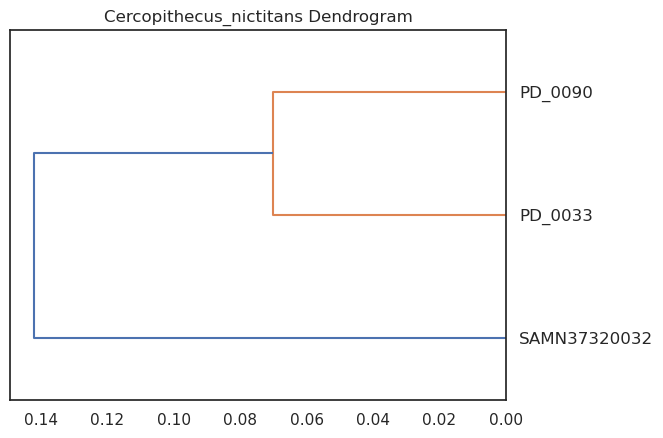

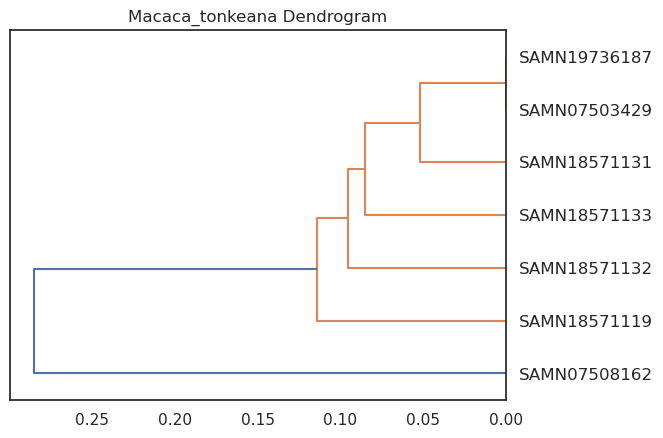

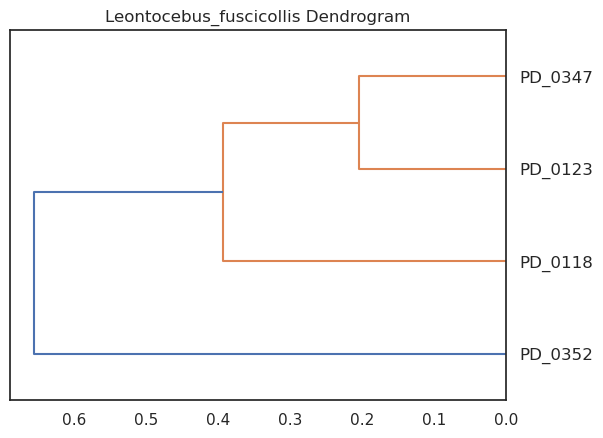

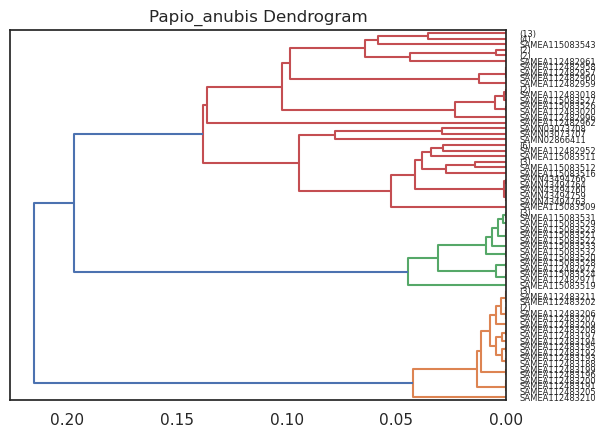

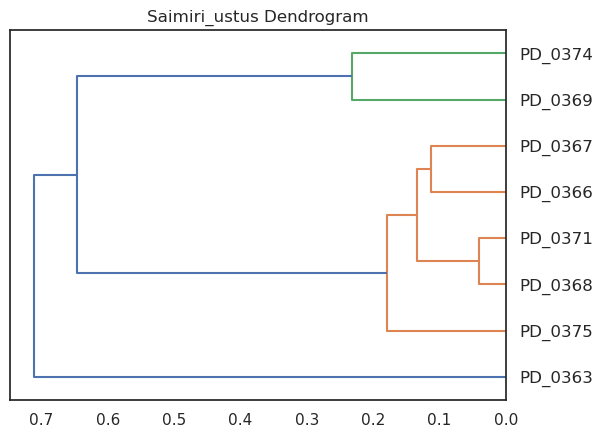

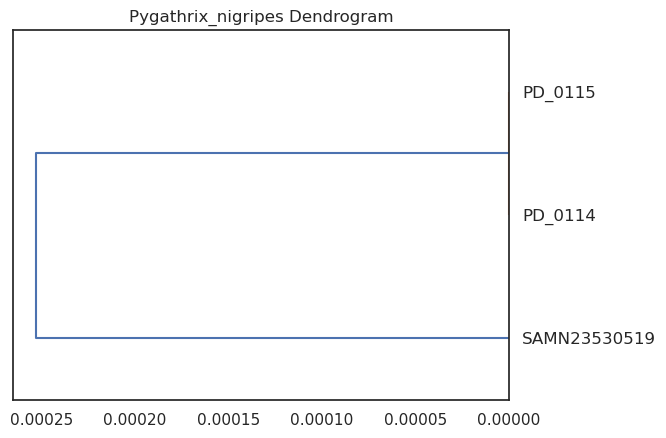

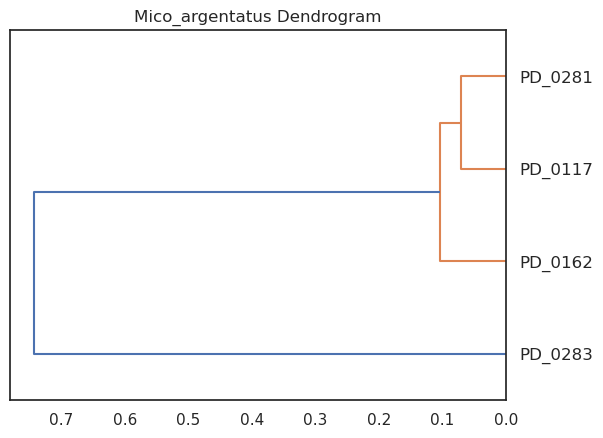

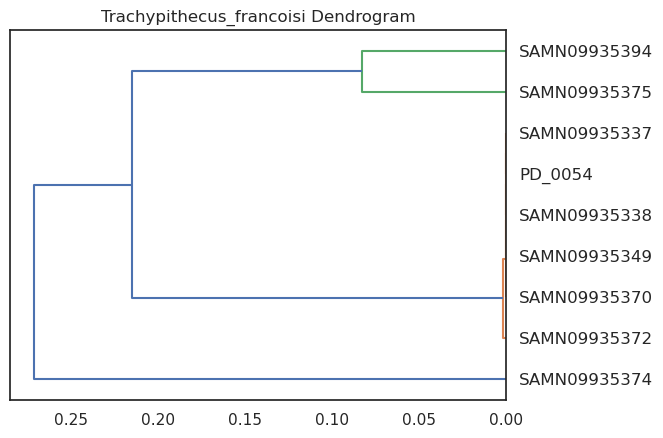

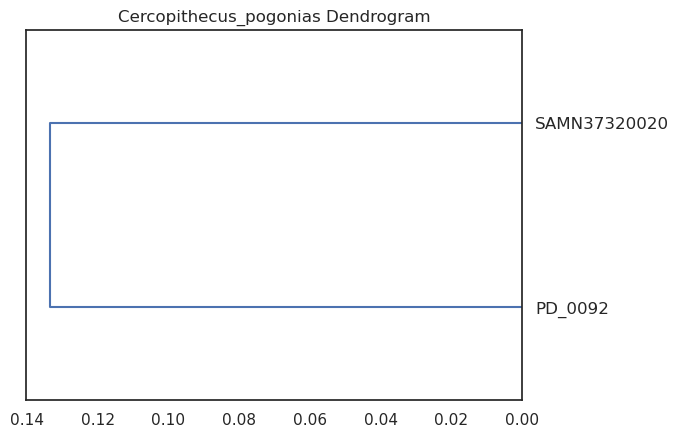

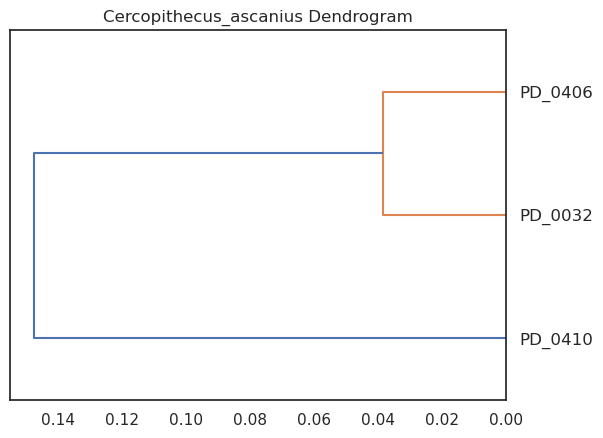

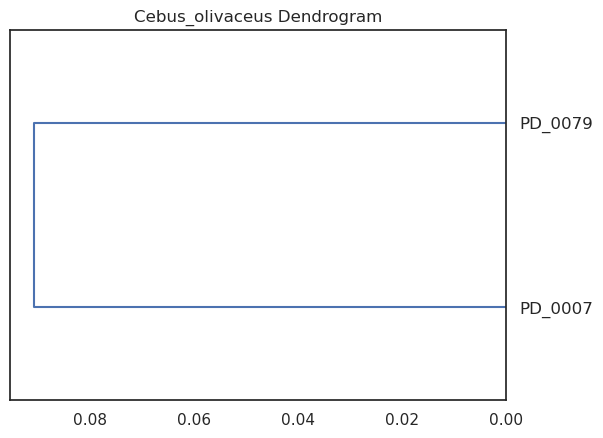

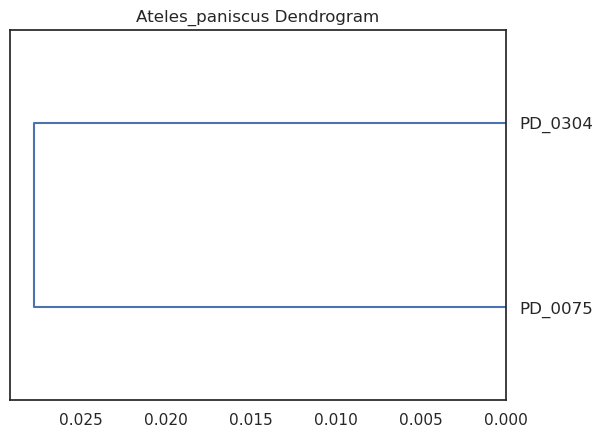

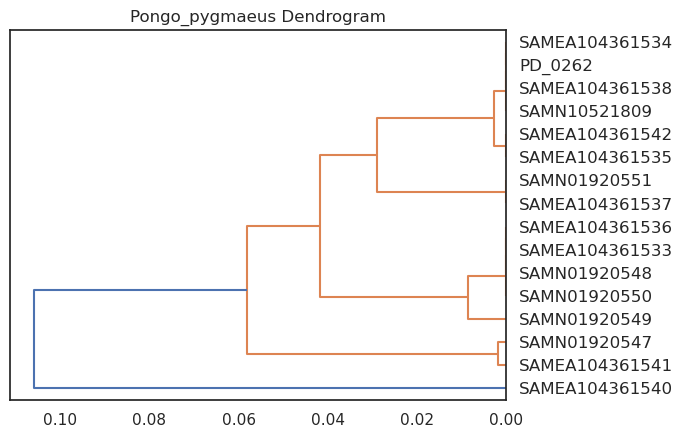

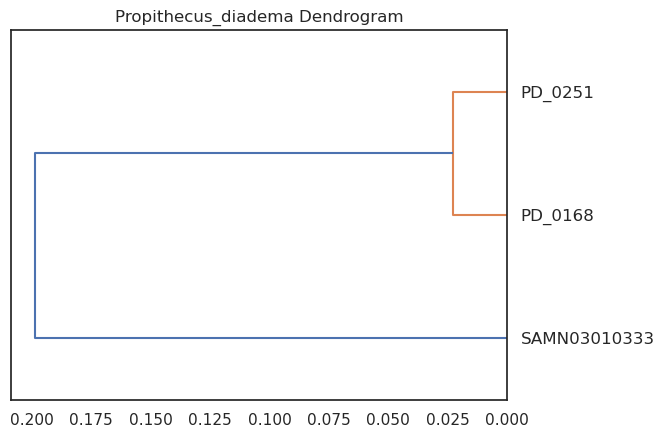

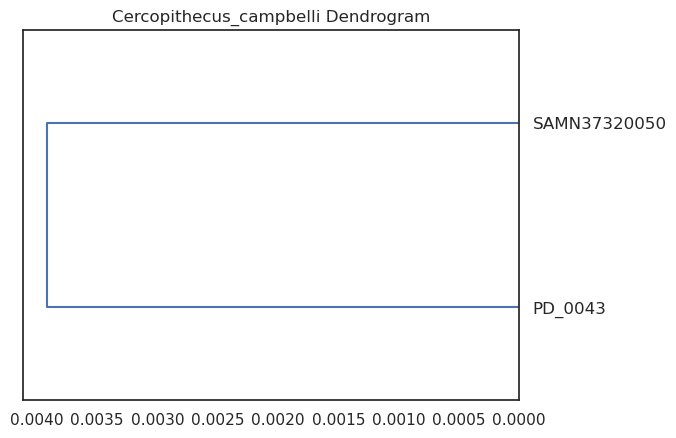

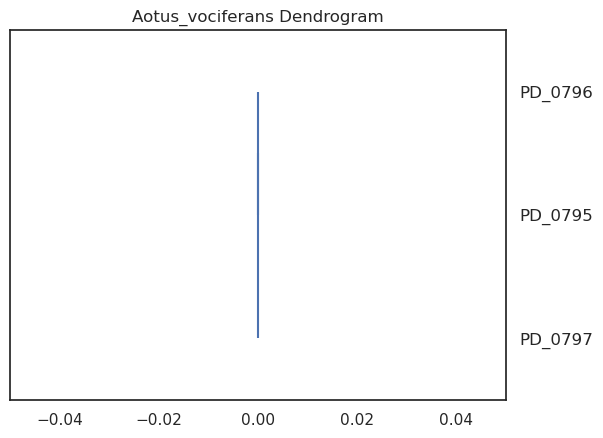

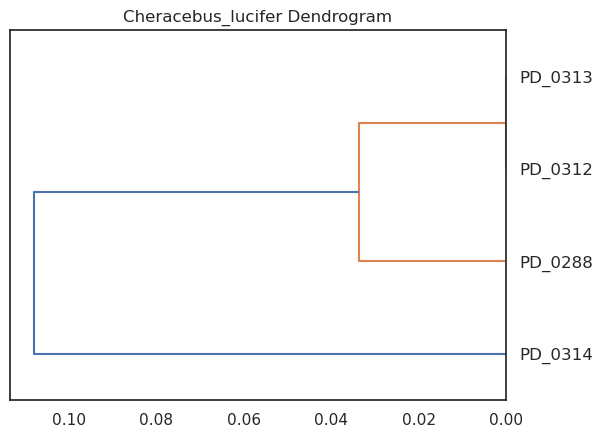

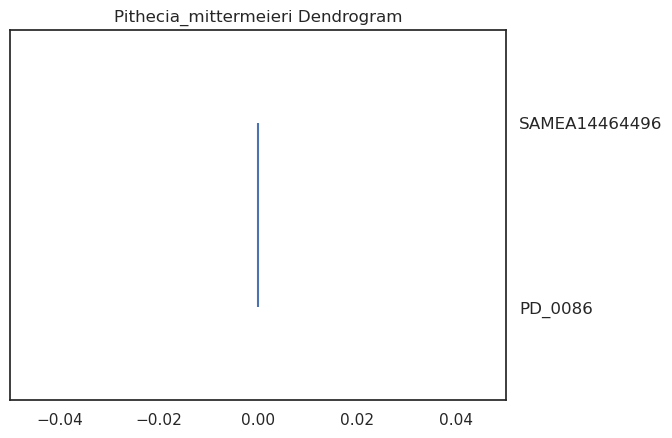

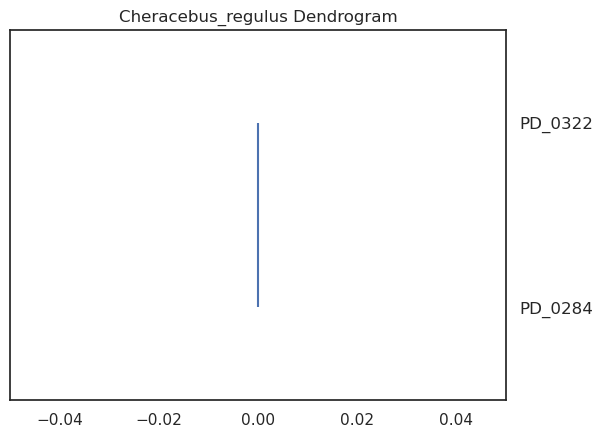

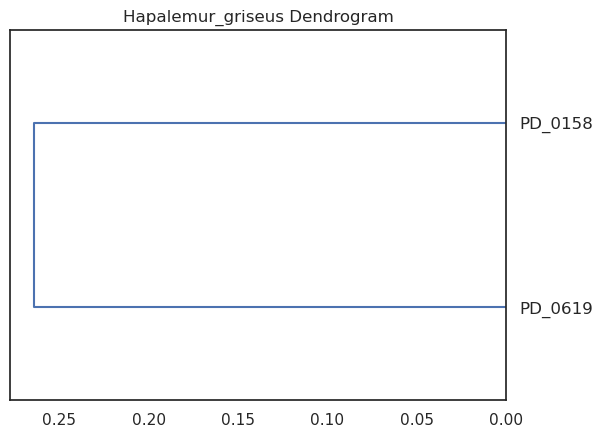

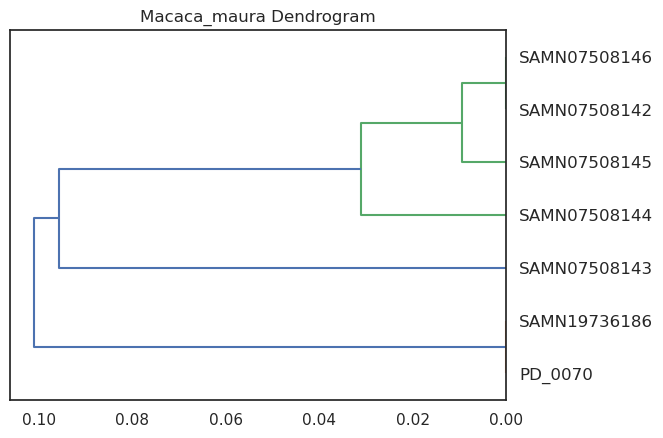

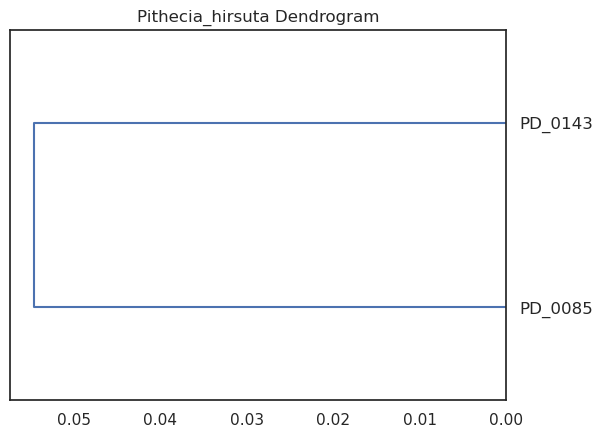

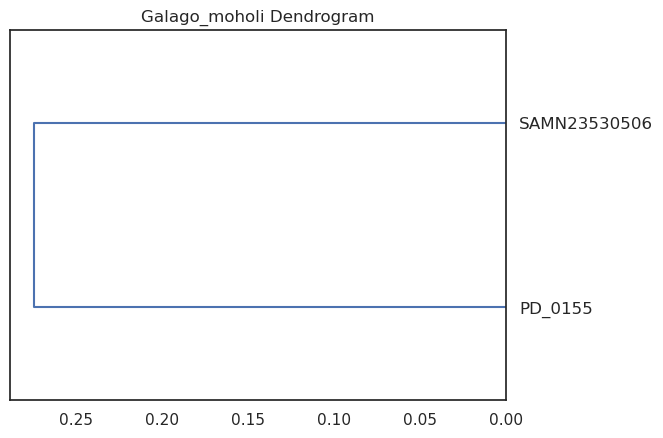

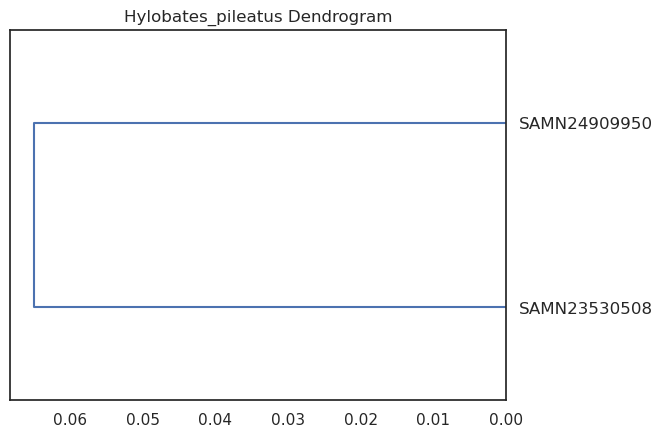

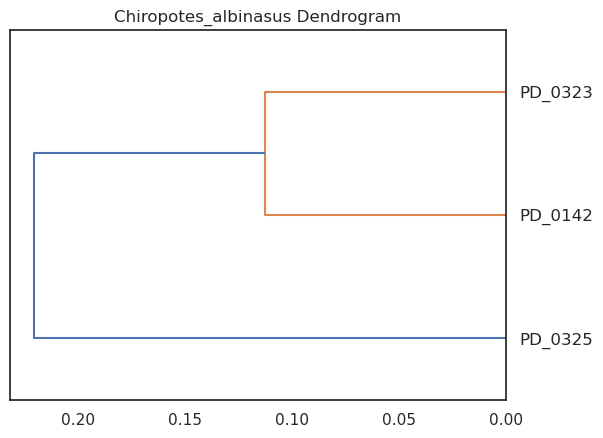

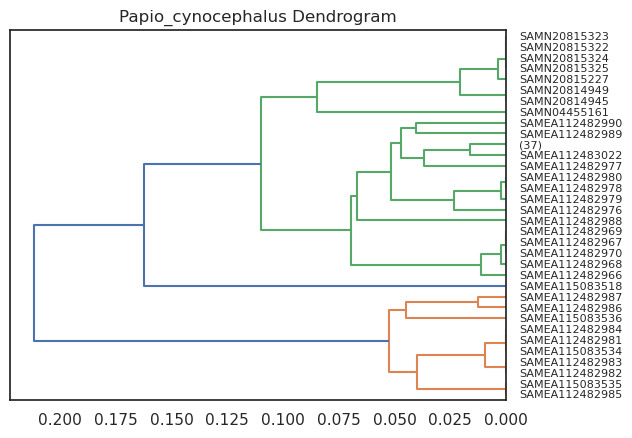

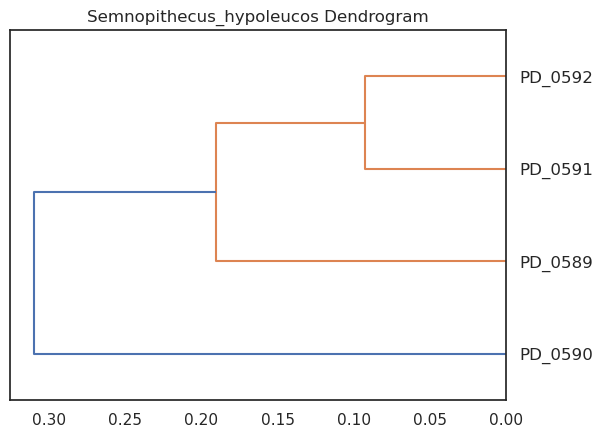

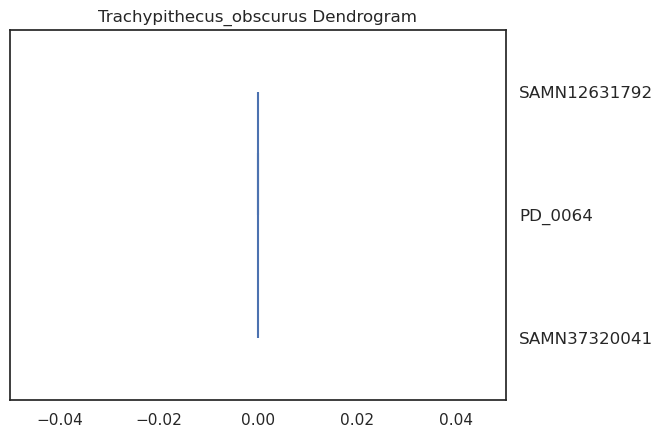

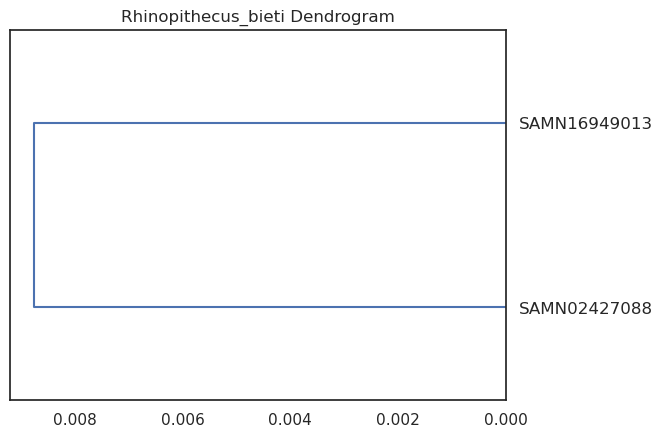

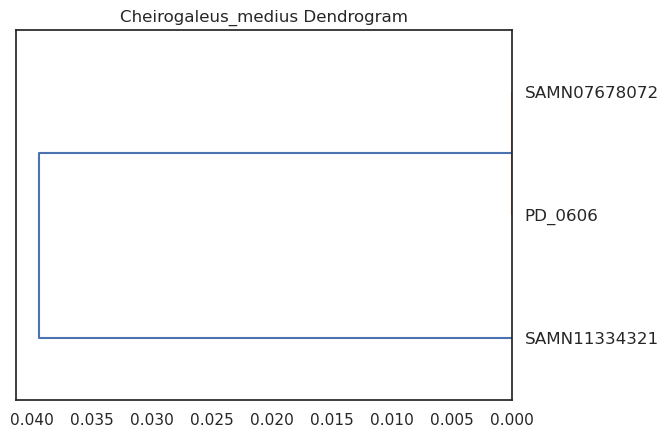

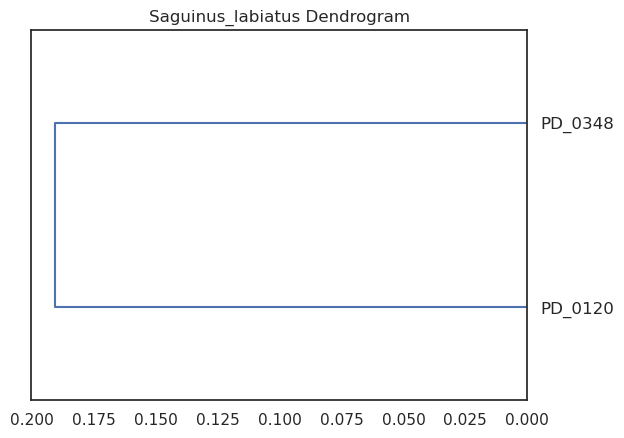

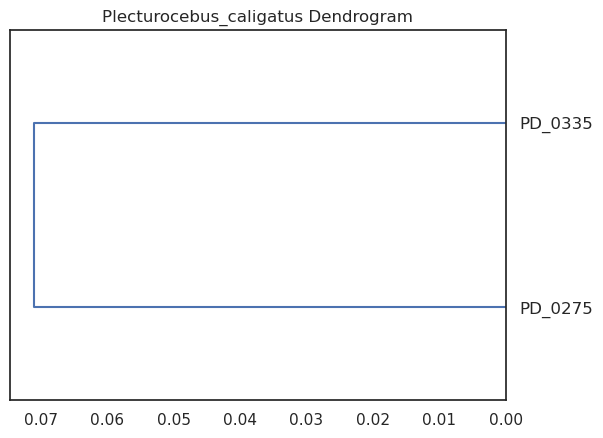

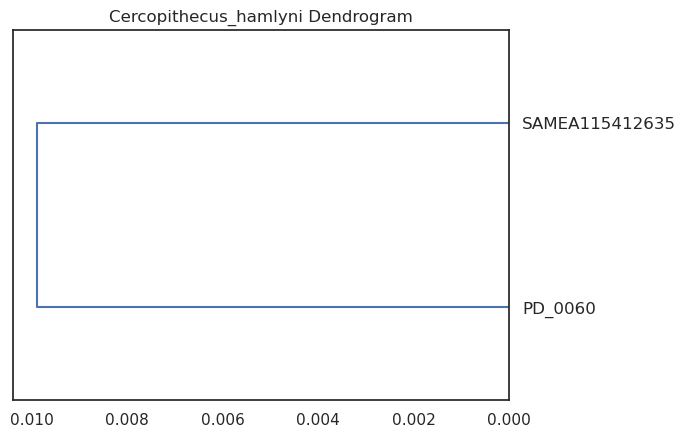

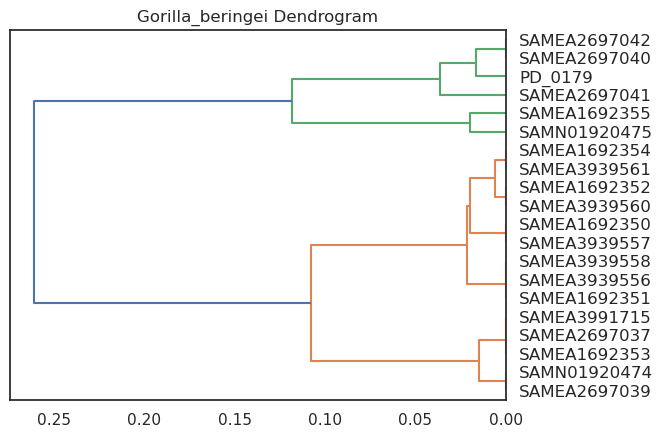

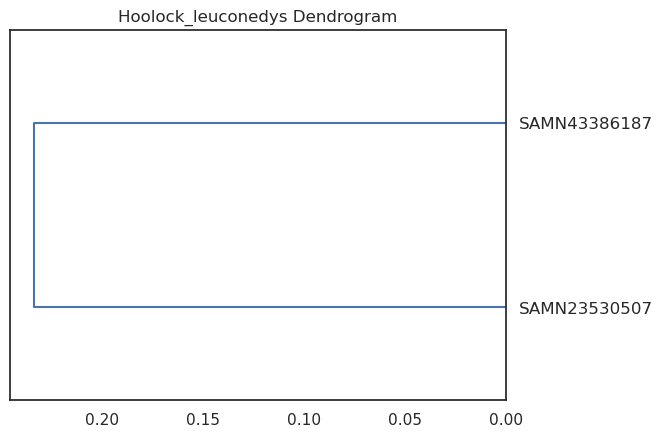

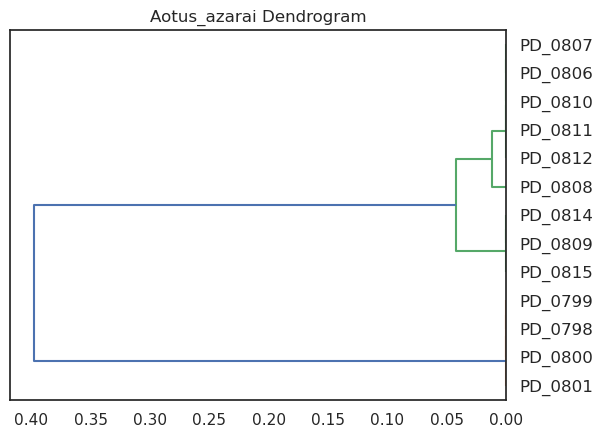

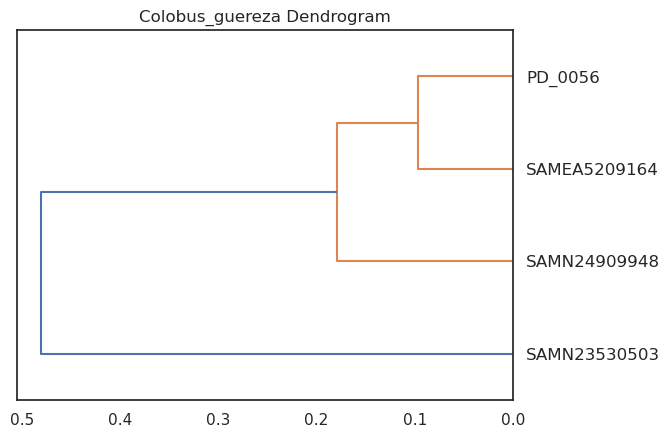

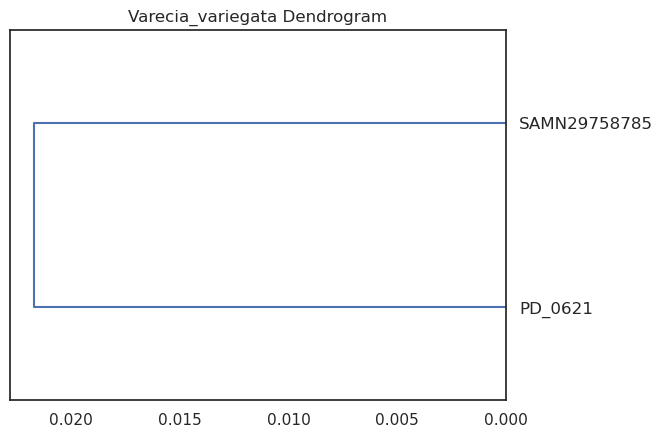

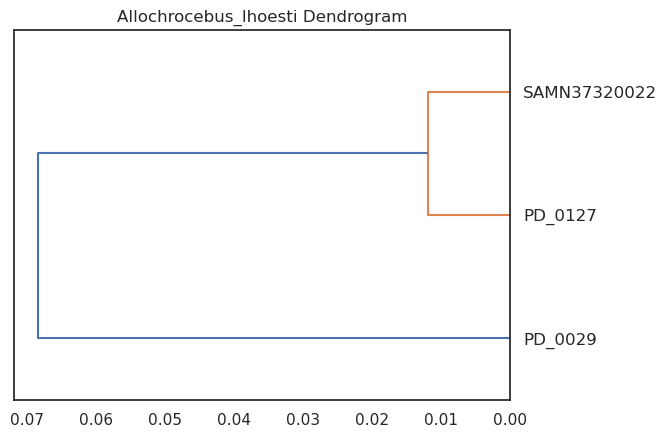

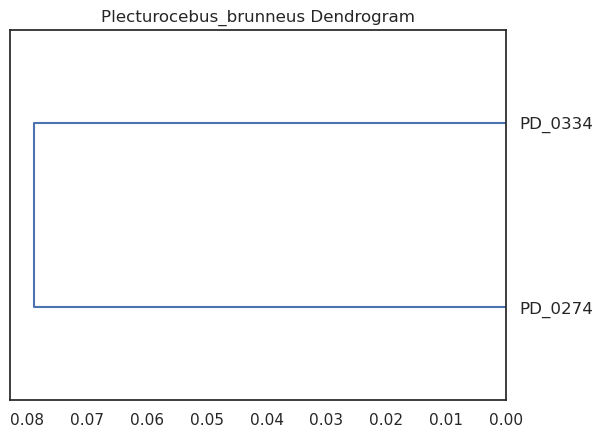

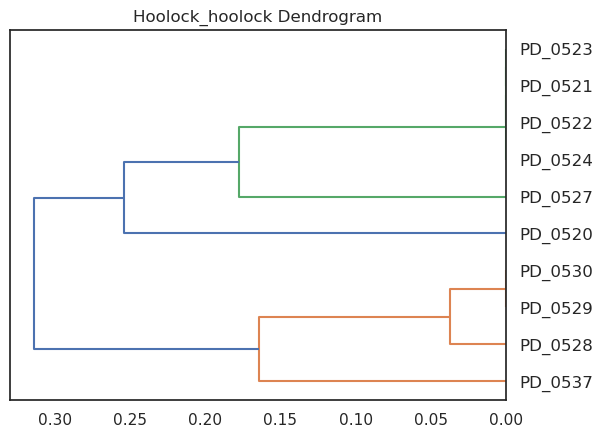

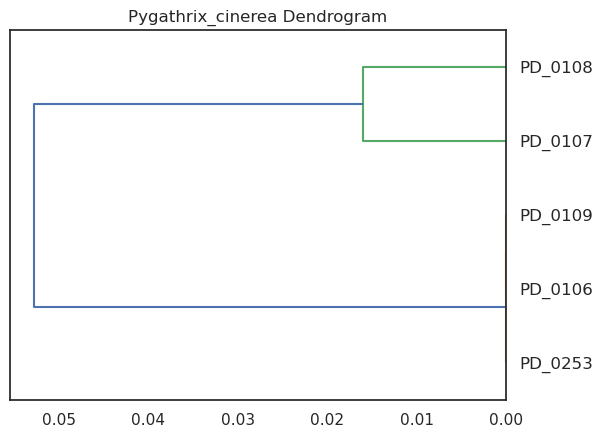

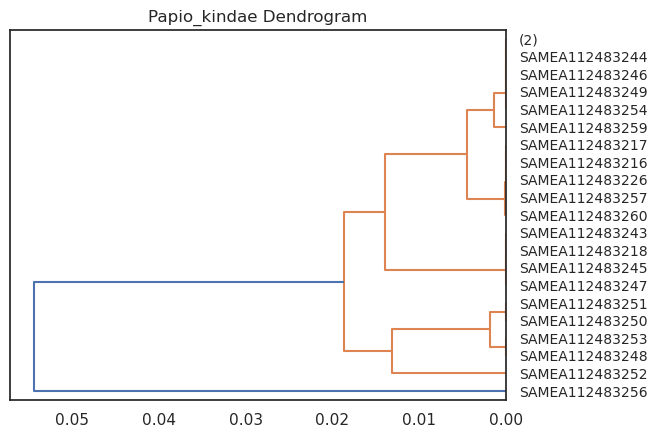

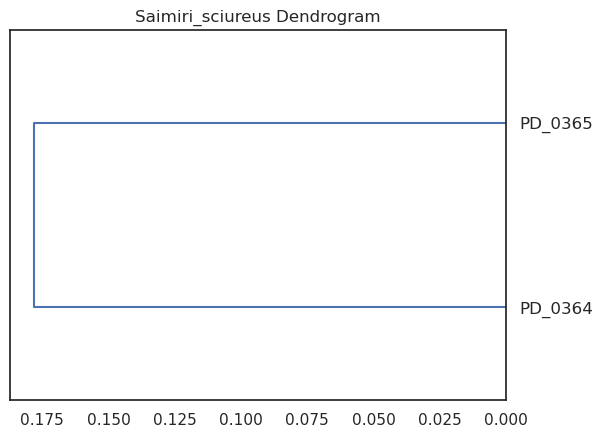

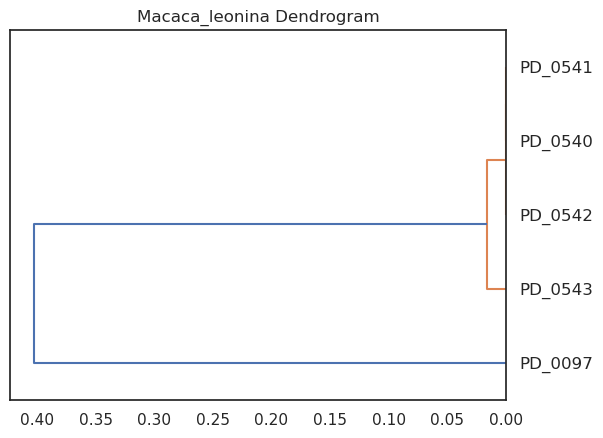

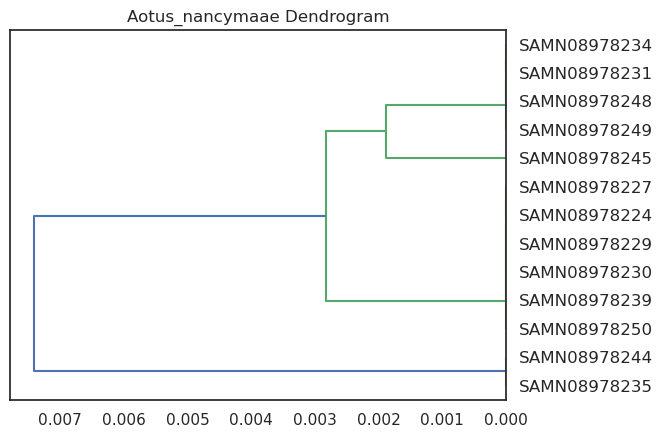

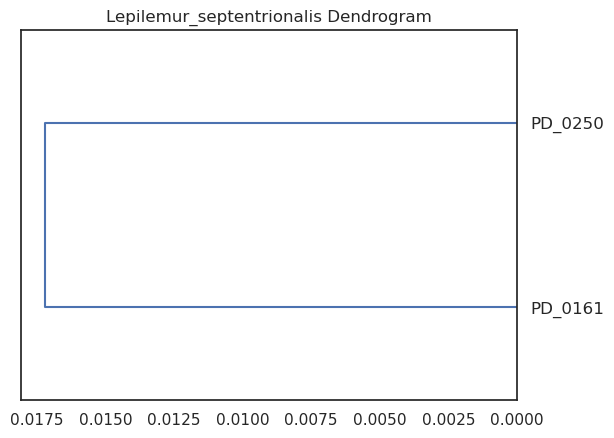

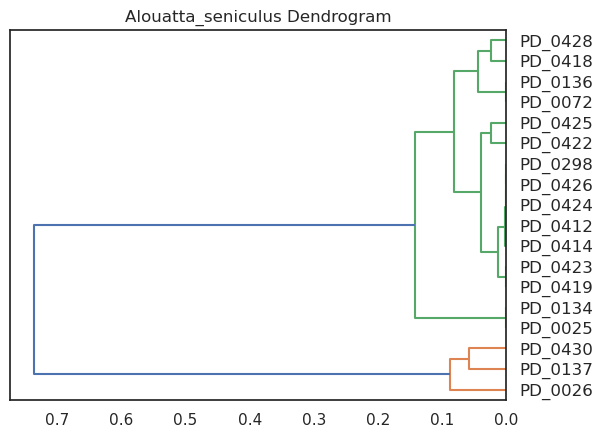

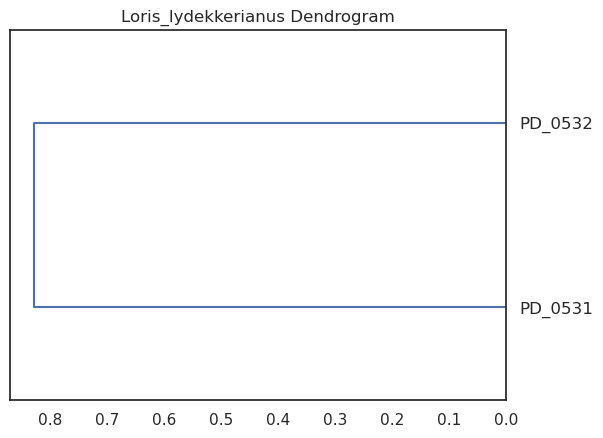

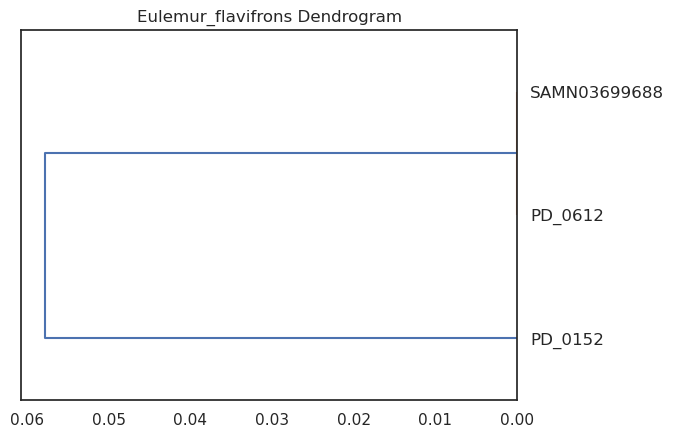

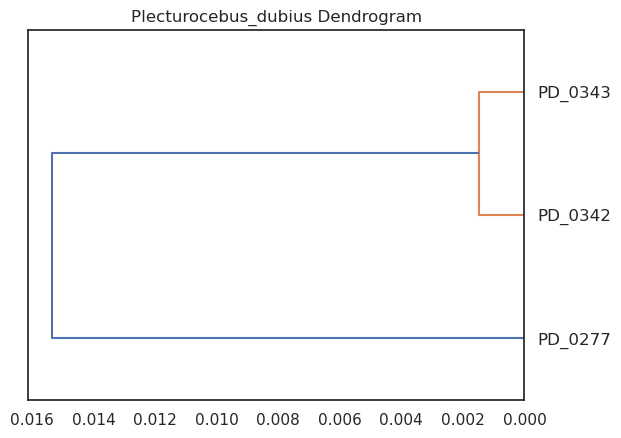

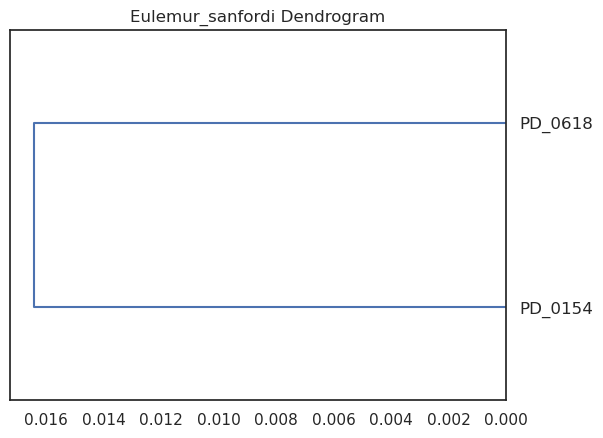

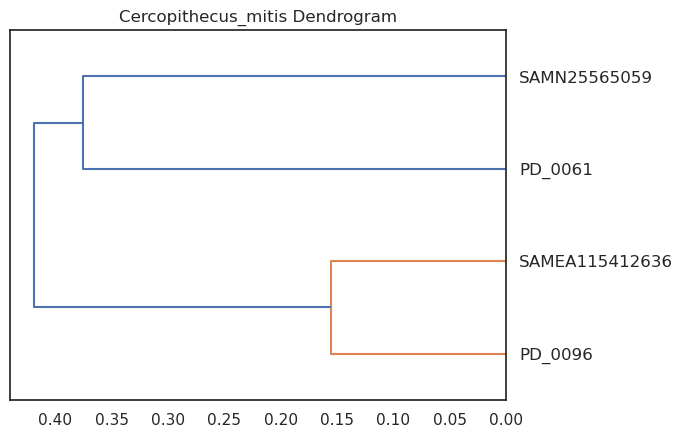

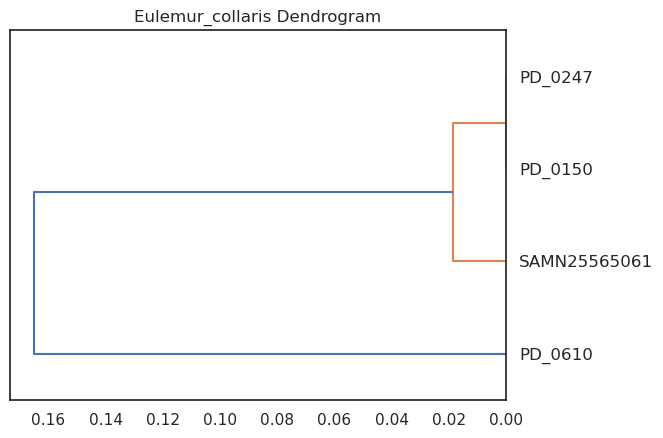

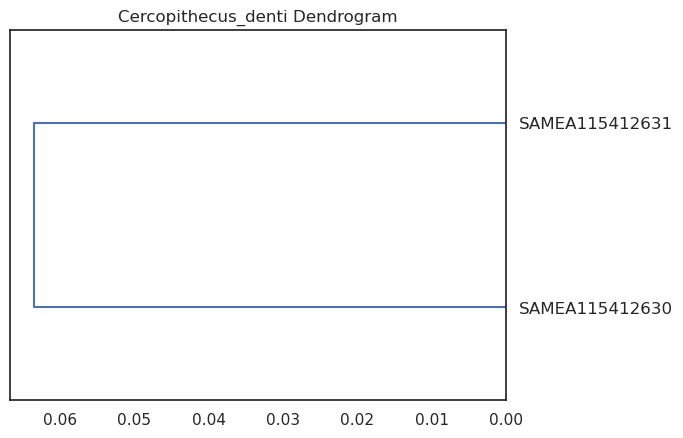

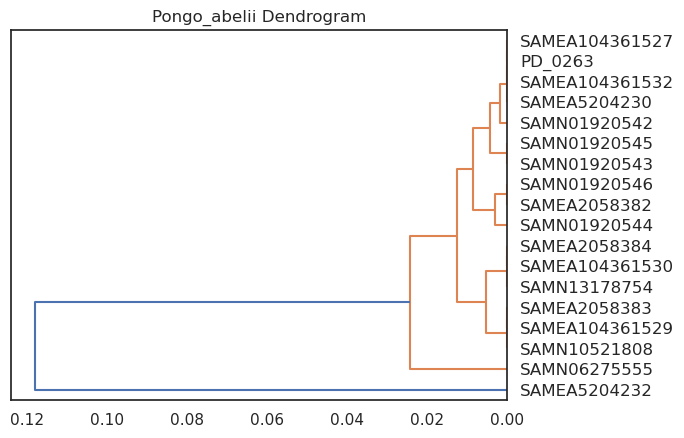

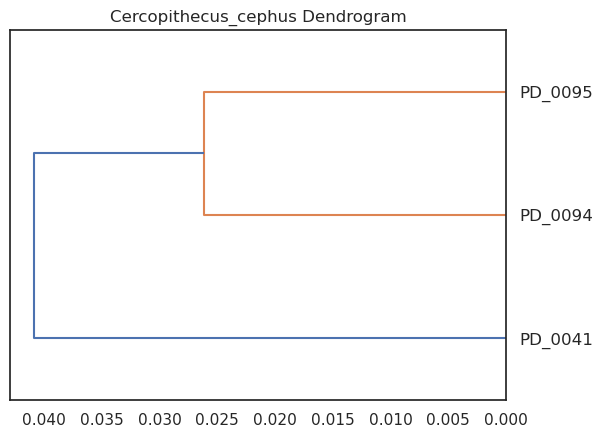

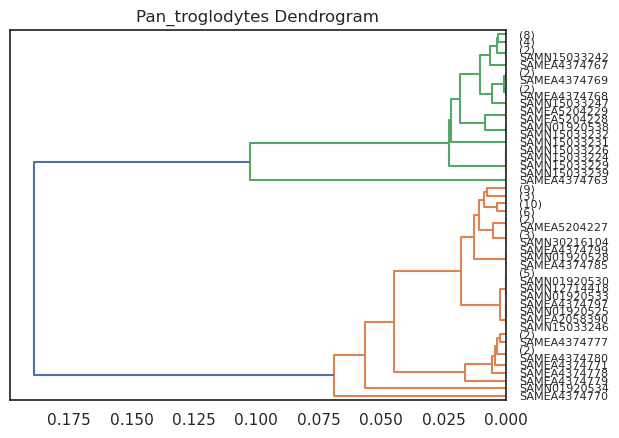

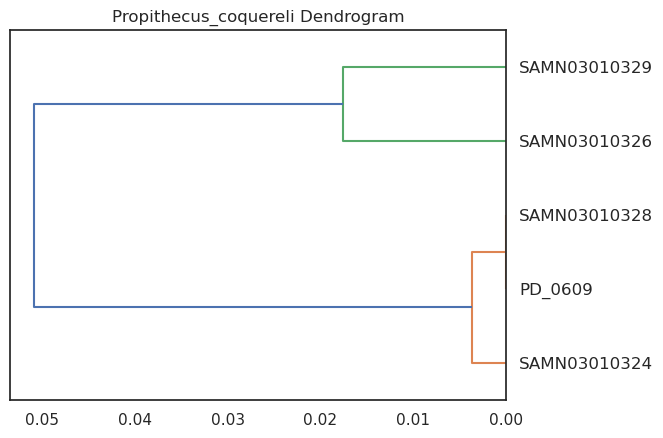

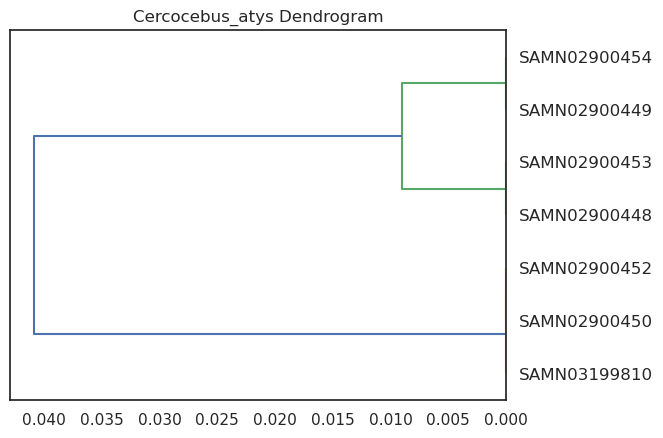

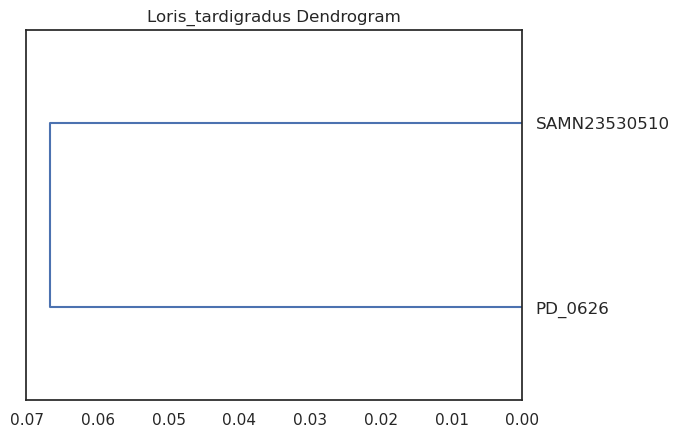

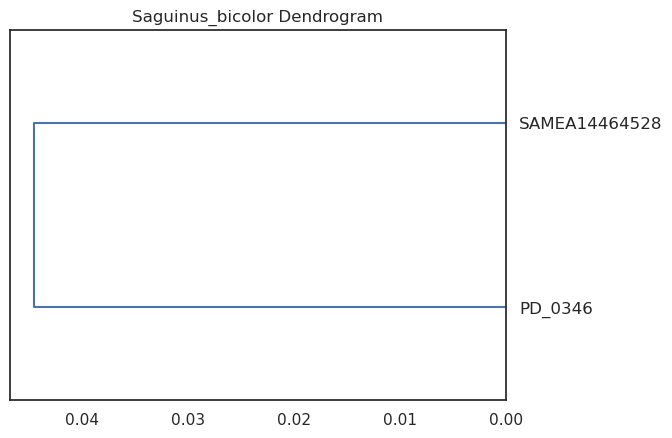

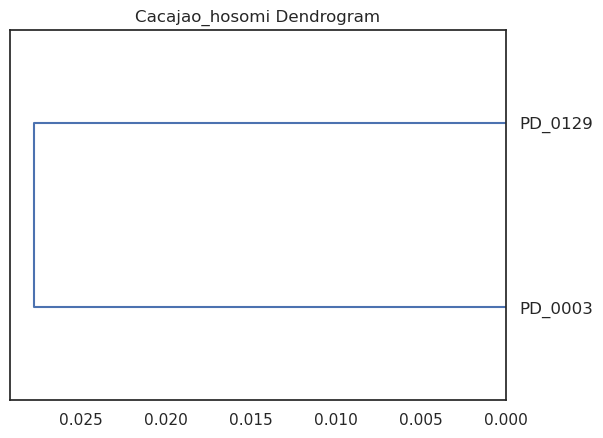

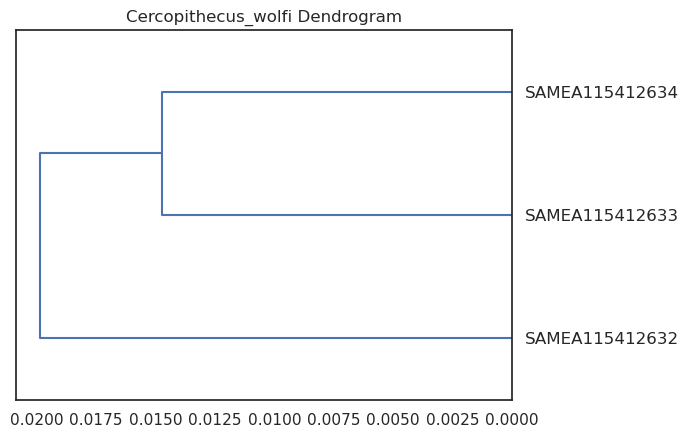

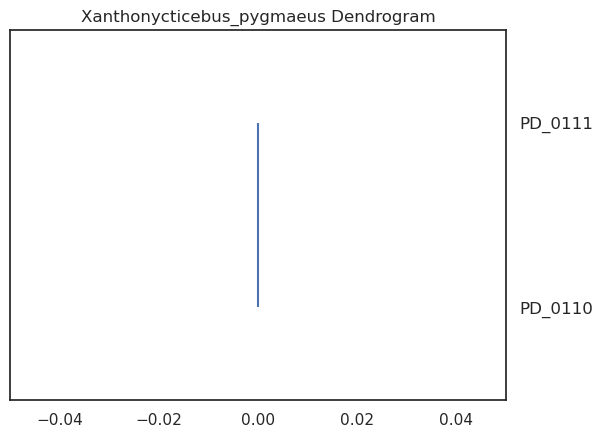

<Figure size 640x480 with 0 Axes>

In [13]:
for p in glob.glob("../results/window_stats_20x_inds/*0.1cutoff_fst*"):
    aut_fst = pd.read_csv(p, sep="\t")
    model = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None, metric="precomputed", linkage="average")
    model = model.fit(aut_fst.clip(0))
    plt.title("{} Dendrogram".format(p.split("/")[-1].split("_ssp_")[0]))
    plot_dendrogram(model, truncate_mode="level", p=8)
    plt.figure()

In [14]:
len(glob.glob("../results/window_stats_20x_inds/*0.1cutoff_fst*"))

150

In [15]:
len(glob.glob("../results/window_stats_20x_inds/*100kb_pi*"))

251

In [16]:
use_c = 0
potential_c = 0
fail_c = 0
for p in glob.glob("../results/window_stats_20x_inds/*100kb_pi*"):
    df = pd.read_csv(p, sep="\t")
    df_x = df.loc[df.chr_type == "chrX"]
    usable_x = df_x.loc[(df_x.callable_frac >= 0.5) & ~(df_x.pi_0.isna())]
    if len(usable_x) > 10:
        use_c += 1
    elif len(usable_x.columns) > 8:
        potential_c += 1
    else:
        fail_c += 1

In [17]:
use_c, potential_c, fail_c

(176, 17, 58)

Determine Pi for the best cluster of the 175 available species.

In [18]:
s_l, c_l, fcount_l, mcount_l, aut_l, x_l, aut_div_l, x_div_l = [], [], [], [], [], [], [], []
for s in sub_vasili.species_genotyping.unique():
    if s == "Macaca_nemestrina_ssp":
        # Discovered a problem with nemestrina, fixing
        continue
    p = '../results/window_stats_20x_inds/{}_100kb_pi_fst0.1.txt'.format(s)
    df = pd.read_csv(p, sep="\t")
    aut_df = df.loc[(df.chr_type == "aut") & (df.callable_frac >= 0.75)]
    x_df = df.loc[(df.chr_type == "chrX") & (df.callable_frac >= 0.75)]
    cluster_count = sum([x.startswith("pi") for x in df.columns])
    if cluster_count == 1:
        mcount_l.append(len(sub_vasili.loc[(sub_vasili.species_genotyping == s) & (sub_vasili.gSEX == "M")]))
        fcount_l.append(len(sub_vasili.loc[(sub_vasili.species_genotyping == s) & (sub_vasili.gSEX == "F")]))
    else:
        fst_p = '../results/window_stats_20x_inds/{}_0.1cutoff_fst.txt'.format(s)
        aut_fst = pd.read_csv(fst_p, sep="\t")
        model = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None, metric="precomputed", linkage="average")
        model = model.fit(aut_fst.clip(0))
        for x in range(cluster_count):
            cluster_IDs = sub_vasili.loc[(sub_vasili.species_genotyping == s)].iloc[model.labels_ == x]
            mcount_l.append(len(cluster_IDs.loc[(cluster_IDs.gSEX == "M")]))
            fcount_l.append(len(cluster_IDs.loc[(cluster_IDs.gSEX == "F")]))
    for x in range(cluster_count):
        s_l.append(s)
        c_l.append(x)
        aut_l.append(aut_df.iloc[:,x*2+3].mean())
        aut_div_l.append(aut_df.iloc[:,x*2+2].mean())
        x_l.append(x_df.iloc[:,x*2+3].mean())
        x_div_l.append(x_df.iloc[:,x*2+2].mean())
c_df = pd.DataFrame({"species": s_l, "cluster": c_l, "females": fcount_l, "males": mcount_l, "aut_pi": aut_l,
                    "aut_divergence": aut_div_l, "x_pi": x_l, "x_divergence": x_div_l})

In [19]:
c_df.loc[c_df.species == "Trachypithecus_poliocephalus_ssp"]#.loc[c_df.cluster >= 1]

species  cluster  females  males     aut_pi  \
409  Trachypithecus_poliocephalus_ssp        0        2      1  39.278546   
410  Trachypithecus_poliocephalus_ssp        1        1      1  34.538849   
411  Trachypithecus_poliocephalus_ssp        2        1      0   8.962281   
412  Trachypithecus_poliocephalus_ssp        3        1      1  10.987637   
413  Trachypithecus_poliocephalus_ssp        4        0      1  10.613980   

     aut_divergence       x_pi  x_divergence  
409      174.273163  14.104678     97.433650  
410      172.757668  16.379277     87.927319  
411      194.009760   5.633968    133.016801  
412      192.811601   6.836501     98.577429  
413      193.969407        NaN     65.479912

In [20]:
c_df["score"] = np.log(c_df.aut_divergence)-np.log(c_df.females*2+c_df.males)

In [21]:
c_df.loc[c_df.species.isin(c_df.loc[c_df.cluster >= 5].species)]

species  cluster  females  males      aut_pi  \
124  Macaca_fascicularis_ssp        0        4      8  340.002886   
125  Macaca_fascicularis_ssp        1       94     18  356.136142   
126  Macaca_fascicularis_ssp        2        3      0  252.058697   
127  Macaca_fascicularis_ssp        3        1      0  270.553285   
128  Macaca_fascicularis_ssp        4        0      1  291.753709   
129  Macaca_fascicularis_ssp        5        0      1  157.344497   
130  Macaca_fascicularis_ssp        6        1      0  263.024220   
131  Macaca_fascicularis_ssp        7        1      0  122.343741   
138       Macaca_mulatta_ssp        0       41     22  286.974983   
139       Macaca_mulatta_ssp        1       12     18  230.543504   
140       Macaca_mulatta_ssp        2        0      3  229.033481   
141       Macaca_mulatta_ssp        3        0      1  191.181142   
142       Macaca_mulatta_ssp        4        0      5  206.580782   
143       Macaca_mulatta_ssp        5        0      1  229.338288   
157       Macaca_silenus_ssp        0        2      0   61.537843   
158       Macaca_silenus_ssp        1        4      4   59.444692   
159       Macaca_silenus_ssp        2        0      1   53.707148   
160       Macaca_silenus_ssp        3        1      0   34.866346   
161       Macaca_silenus_ssp        4        0      1   46.198349   
162       Macaca_silenus_ssp        5        1      0   35.716296   
163       Macaca_silenus_ssp        6        0      1   28.226776   
164       Macaca_silenus_ssp        7        1      0   53.809564   
168     Macaca_arctoides_ssp        0        1      1  111.682114   
169     Macaca_arctoides_ssp        1        1      1  170.252506   
170     Macaca_arctoides_ssp        2        1      0   85.394756   
171     Macaca_arctoides_ssp        3        1      0   62.683679   
172     Macaca_arctoides_ssp        4        0      1   90.430580   
173     Macaca_arctoides_ssp        5        1      0  102.397881   
234         Papio_anubis_ssp        0       20      7  183.360387   
235         Papio_anubis_ssp        1       12     10  189.680917   
236         Papio_anubis_ssp        2        9      7  162.068900   
237         Papio_anubis_ssp        3        8     15  168.433088   
238         Papio_anubis_ssp        4        1      0  147.567105   
239         Papio_anubis_ssp        5        4      3  211.876090   
255       Cacajao_calvus_ssp        0        0      5  100.260761   
256       Cacajao_calvus_ssp        1        1      1  112.028748   
257       Cacajao_calvus_ssp        2        1      1  117.823031   
258       Cacajao_calvus_ssp        3        2      0  109.716524   
259       Cacajao_calvus_ssp        4        2      0  102.803510   
260       Cacajao_calvus_ssp        5        2      1   63.749051   
261       Cacajao_calvus_ssp        6        0      1   91.624894   
262       Cacajao_calvus_ssp        7        1      0   83.675982   
355        Saimiri_ustus_ssp        0        0      2   62.049104   
356        Saimiri_ustus_ssp        1        0      1   43.728271   
357        Saimiri_ustus_ssp        2        0      1  108.005958   
358        Saimiri_ustus_ssp        3        0      1   63.835632   
359        Saimiri_ustus_ssp        4        1      0   94.527503   
360        Saimiri_ustus_ssp        5        1      0   53.519301   
361        Saimiri_ustus_ssp        6        0      1   54.269852   
371       Sapajus_apella_ssp        0        0      5  158.388865   
372       Sapajus_apella_ssp        1        1      2  148.944486   
373       Sapajus_apella_ssp        2        0      1  154.244054   
374       Sapajus_apella_ssp        3        1      1  151.668535   
375       Sapajus_apella_ssp        4        0      1  138.293128   
376       Sapajus_apella_ssp        5        1      0  111.380520   
377       Sapajus_apella_ssp        6        0      1  149.603975   

     aut_divergence        x_pi  x_divergence     score  
124      763.740101  169.6914

In [22]:
c_df.sort_values("aut_divergence")

species  cluster  females  males      aut_pi  \
223       Otolemur_crassicaudatus_ssp        0        1      0   27.922773   
123        Leontopithecus_rosalia_ssp        0        2      0   39.648283   
108            Hoolock_leuconedys_ssp        0        1      0   57.973633   
327       Rhinopithecus_roxellana_ssp        2        0      1   35.772062   
84   Daubentonia_madagascariensis_ssp        1        2      2   56.227448   
..                                ...      ...      ...    ...         ...   
216            Perodicticus_potto_ssp        1        0      1  102.687211   
188        Lepilemur_ruficaudatus_ssp        0        0      1  223.571817   
186        Lepilemur_ankaranensis_ssp        0        2      0  366.115451   
187            Lepilemur_dorsalis_ssp        0        0      1  201.635258   
189     Lepilemur_septentrionalis_ssp        0        0      2  351.017426   

     aut_divergence        x_pi  x_divergence     score  
223       27.970604    9.318080      9.379595  2.638007  
123       54.630353   16.793928     23.937984  2.614295  
108       58.106090   22.886022     23.012186  3.369123  
327       77.090854         NaN     16.820946  4.344985  
84        96.094942   40.200360     49.168709  2.773577  
..              ...         ...           ...       ...  
216     9318.736518         NaN   4344.360000  9.139782  
188     9737.283343         NaN   4302.141892  9.183717  
186     9816.067853  246.593407   8644.258242  7.805482  
187     9829.202128         NaN   4372.982558  9.193113  
189     9848.835792  177.452991   4300.948718  8.501961  

[417 rows x 9 columns]

In [23]:
c_df.loc[c_df.species == "Macaca_arctoides_ssp"].sort_values("aut_divergence")

species  cluster  females  males      aut_pi  \
170  Macaca_arctoides_ssp        2        1      0   85.394756   
168  Macaca_arctoides_ssp        0        1      1  111.682114   
169  Macaca_arctoides_ssp        1        1      1  170.252506   
171  Macaca_arctoides_ssp        3        1      0   62.683679   
173  Macaca_arctoides_ssp        5        1      0  102.397881   
172  Macaca_arctoides_ssp        4        0      1   90.430580   

     aut_divergence       x_pi  x_divergence     score  
170      765.515873  13.388619    558.443442  5.947403  
168      797.721636  28.380985    430.339695  5.583147  
169      797.924597  51.477446    431.907009  5.583402  
171      800.471321   9.496877    577.571825  5.992054  
173      804.382637  22.034004    579.974323  5.996928  
172      804.577004        NaN    291.215822  6.690317

In [24]:
selected_clusters = c_df.sort_values('score').drop_duplicates('species')
selected_clusters = selected_clusters.loc[selected_clusters.x_pi >= 0]
selected_clusters["X Autosome Ratio"] = selected_clusters.x_pi/selected_clusters.aut_pi

In [25]:
c_df.females.sum(), c_df.males.sum(), 729+638, selected_clusters["X Autosome Ratio"].mean()

(729, 638, 1367, 0.5079688929899756)

In [26]:
selected_clusters.sort_values(["X Autosome Ratio"])

species  cluster  females  males      aut_pi  \
196         Mirza_coquereli_ssp        0        1      0  126.745616   
366          Cebus_imitator_ssp        1        1      0   46.593993   
168        Macaca_arctoides_ssp        0        1      1  111.682114   
184  Mandrillus_leucophaeus_ssp        0        1      0  207.198946   
38          Mico_argentatus_ssp        2        1      0   57.963327   
..                          ...      ...      ...    ...         ...   
269    Chiropotes_sagulatus_ssp        0        3      1  184.573407   
264  Cacajao_melanocephalus_ssp        0        1      1   91.542546   
254          Cacajao_ayresi_ssp        0        3      0   53.550502   
4        Aotus_griseimembra_ssp        0        0      3  152.587848   
260          Cacajao_calvus_ssp        5        2      1   63.749051   

     aut_divergence        x_pi  x_divergence     score  X Autosome Ratio  
196     5327.086382   29.122867   4623.689420  7.887413          0.229774  
366     2375.967440   10.722611   1840.992236  7.080013          0.230129  
168      797.721636   28.380985    430.339695  5.583147          0.254123  
184      987.785486   56.650522    425.814456  6.202318          0.273411  
38      2433.852356   16.589244   1982.799688  7.104083          0.286202  
..              ...         ...           ...       ...               ...  
269     4943.998851  134.223980   3660.384052  6.560020          0.727212  
264     4829.942505   68.900784   3052.870235  7.383978          0.752664  
254     4833.073055   41.411634   4071.249188  6.691478          0.773319  
4       1722.498168  124.390181    689.962162  6.352919          0.815204  
260     4822.508522   51.976129   3385.083806  6.871612          0.815324  

[181 rows x 10 columns]

In [27]:
sub_vasili.loc[sub_vasili.genus == "Macaca"].species_genotyping.unique()

array(['Macaca_fascicularis_ssp', 'Macaca_cyclopis_ssp',
       'Macaca_fuscata_ssp', 'Macaca_mulatta_ssp', 'Macaca_sylvanus_ssp',
       'Macaca_brunnescens_ssp', 'Macaca_hecki_ssp', 'Macaca_leonina_ssp',
       'Macaca_maura_ssp', 'Macaca_nemestrina_ssp', 'Macaca_nigra_ssp',
       'Macaca_nigrescens_ssp', 'Macaca_siberu_ssp', 'Macaca_silenus_ssp',
       'Macaca_tonkeana_ssp', 'Macaca_arctoides_ssp',
       'Macaca_assamensis_ssp', 'Macaca_leucogenys_ssp',
       'Macaca_radiata_ssp', 'Macaca_thibetana_ssp'], dtype=object)

<Axes: xlabel='X Autosome Ratio', ylabel='Count'>

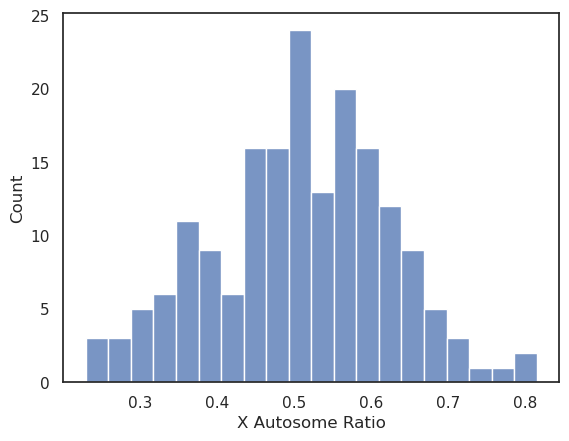

In [28]:
sns.histplot(selected_clusters, x="X Autosome Ratio", bins=20)

In [29]:
mating_vas = pd.read_excel("../data/PrimatePhenotypes_december.xlsx", sheet_name=8)
mating_vas

binomial_name  Monogamous  Polygynous  Polygynandrous  \
0     Allenopithecus_nigroviridis           0           0               1   
1             Allocebus_trichotis           2           1               0   
2           Allochrocebus_lhoesti           0           3               0   
3           Allochrocebus_preussi           0           1               0   
4           Allochrocebus_solatus           0           1               0   
..                            ...         ...         ...             ...   
311        Trachypithecus_phayrei           0           2               1   
312       Trachypithecus_pileatus           0           2               0   
313  Trachypithecus_selangorensis           0           1               0   
314                 Varecia_rubra           0           1               1   
315             Varecia_variegata           3           0               1   

     Polyandrous  lowSC  highSC       consensus      comment  \
0              0      0       1  Polygynandrous          NaN   
1              0      3       0      Monogamous          NaN   
2              0      3       0      Polygynous          NaN   
3              0      1       0      Polygynous          NaN   
4              0      1       0      Polygynous          NaN   
..           ...    ...     ...             ...          ...   
311            0      2       1             NaN  conflicting   
312            0      2       0      Polygynous          NaN   
313            0      1       0      Polygynous          NaN   
314            0      1       1             NaN  conflicting   
315            1      3       2             NaN  conflicting   

     Juliana_Christina genus_comment  
0                  NaN           NaN  
1                  NaN           NaN  
2                  NaN           NaN  
3                  NaN           NaN  
4                  NaN           NaN  
..                 ...           ...  
311                NaN           NaN  
312                NaN           NaN  
313                NaN           NaN  
314                NaN           NaN  
315                NaN           NaN  

[316 rows x 11 columns]

In [30]:
selected_clusters["binomial_name"] = [x[:-4] for x in selected_clusters.species]
selected_clusters["strategy"] = selected_clusters.binomial_name.map(dict(zip(mating_vas.binomial_name, mating_vas.consensus)))

In [31]:
selected_clusters.loc[selected_clusters.strategy == "Monogamous"]

species  cluster  females  males      aut_pi  \
123     Leontopithecus_rosalia_ssp        0        2      0   39.648283   
28           Callimico_goeldii_ssp        0        2      0  100.662042   
274          Pithecia_pithecia_ssp        0        2      2  143.715814   
116         Hylobates_pileatus_ssp        0        1      1   82.059851   
378   Symphalangus_syndactylus_ssp        0        2      2  171.737888   
104            Hoolock_hoolock_ssp        1        2      2   62.049321   
294       Plecturocebus_dubius_ssp        0        2      1  236.818185   
290      Plecturocebus_cupreus_ssp        0        1      1  178.185288   
288    Plecturocebus_caligatus_ssp        0        1      1  215.119731   
287     Plecturocebus_brunneus_ssp        0        1      1  173.770410   
205              Nomascus_siki_ssp        0        1      0  191.050152   
289  Plecturocebus_cinerascens_ssp        0        1      1  282.181541   
203        Nomascus_gabriellae_ssp        0        1      0  154.417657   
113              Hylobates_lar_ssp        0        1      1  211.264560   
273      Pithecia_mittermeieri_ssp        0        1      1   83.977599   
272           Pithecia_hirsuta_ssp        0        1      1  146.358945   
285    Plecturocebus_bernhardi_ssp        1        1      0  262.842979   
298       Plecturocebus_moloch_ssp        0        1      0  107.448373   
297      Plecturocebus_miltoni_ssp        0        1      0  168.439102   
4           Aotus_griseimembra_ssp        0        0      3  152.587848   
7             Aotus_vociferans_ssp        0        0      3  328.383284   
111           Hylobates_agilis_ssp        0        1      0  237.753121   
270          Pithecia_albicans_ssp        0        1      0  133.604144   
276         Cheracebus_lucifer_ssp        0        3      0  233.457050   
6            Aotus_trivirgatus_ssp        0        1      0  108.717191   
39            Mico_humeralifer_ssp        0        1      0  127.699006   
38             Mico_argentatus_ssp        2        1      0   57.963327   
33       Cebuella_niveiventris_ssp        1        1      0   72.125970   
311       Propithecus_edwardsi_ssp        0        1      0  164.057031   
264     Cacajao_melanocephalus_ssp        0        1      1   91.542546   
118          Hapalemur_griseus_ssp        1        1      0  423.731359   
283       Cheracebus_torquatus_ssp        0        1      0  162.493490   
306                Indri_indri_ssp        0        1      0  412.136990   
305           Avahi_peyrierasi_ssp        0        1      0  245.518563   

     aut_divergence        x_pi  x_divergence     score  X Autosome Ratio  \
123       54.630353   16.793928     23.937984  2.614295          0.423573   
28       145.215757   49.032854     71.731045  3.591926          0.487104   
274      242.181279   71.172295     87.798606  3.697927          0.495229   
116      123.180204   51.790307     53.694733  3.715036          0.631128   
378      270.387820  109.855467    125.625000  3.808098          0.639669   
104      428.020136   41.189137    235.476439  4.267411          0.663813   
294      558.803722  133.144504    345.118794  4.716360          0.562222   
290      450.746630  100.533637    232.841047  5.012293          0.564208   
288      574.490431  132.087332    313.801599  5.254871          0.614018   
287      579.333947   91.388041    314.124809  5.263267          0.525913   
205      573.055690  117.557778    406.406667  5.657836          0.615324   
289     1006.841228  127.967027    556.976816  5.815961          0.453492   
203      724.834561   84.802952    513.716605  5.892796          0.549179   
113     1199.878817  118.145968    682.791935  5.991364          0.559232   
273     1353.657155   39.240986    780.319455  6.111953          0.467279   
272     1355.837587   86.382697    779.805924  6.113562          0.590211   
285      961.146793  124.874238    696.409299  6.174980          0.475091   
298      961.89

[Text(0.5, 0, 'Autosomal Diversity'),
 Text(0, 0.5, 'X chromosomal Diversity'),
 Text(0.5, 1.0, 'Macaque Diversity')]

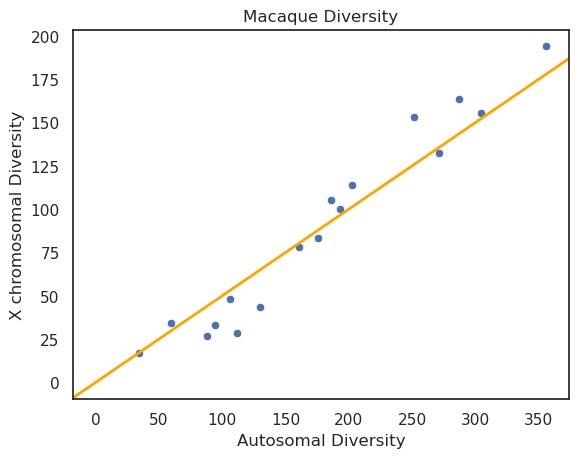

In [32]:
macaque_species = sub_vasili.loc[sub_vasili.genus == "Macaca"].species_genotyping.unique()
macaque_df = selected_clusters.loc[selected_clusters.species.isin(macaque_species)]
plt.axline((0, 0), slope=0.5, linewidth=2, color='orange')
g = sns.scatterplot(macaque_df, x="aut_pi", y="x_pi")
g.set(xlabel="Autosomal Diversity", ylabel="X chromosomal Diversity", title="Macaque Diversity")

<Axes: xlabel='X Autosome Ratio', ylabel='Count'>

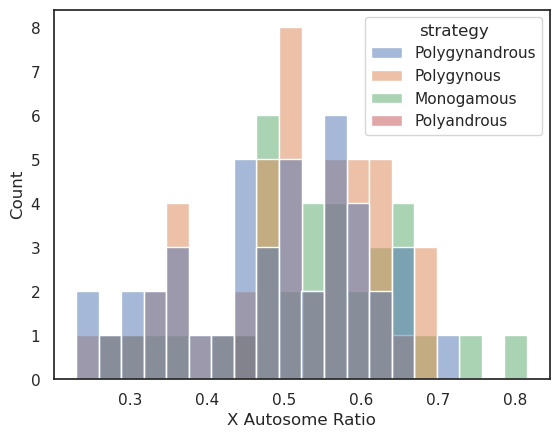

In [33]:
sns.histplot(selected_clusters, x="X Autosome Ratio", bins=20, hue="strategy")

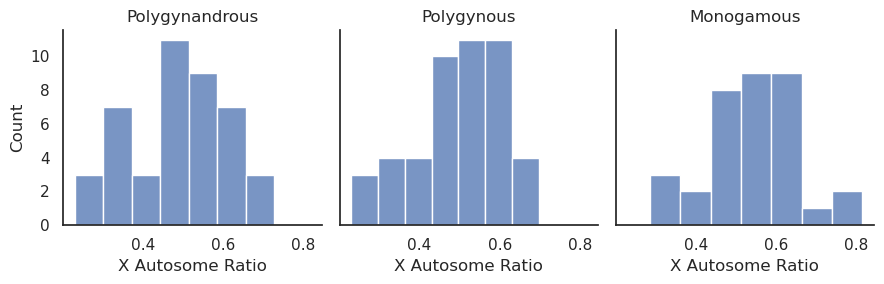

In [34]:
g = sns.FacetGrid(selected_clusters.loc[selected_clusters.strategy != "Polyandrous"], col="strategy")
g.map(sns.histplot, "X Autosome Ratio")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

In [35]:
selected_clusters.groupby("strategy")[["X Autosome Ratio"]].mean()

X Autosome Ratio
strategy                        
Monogamous              0.538814
Polyandrous             0.447411
Polygynandrous          0.489019
Polygynous              0.503723

In [36]:
testes_vas = pd.read_excel("../data/PrimatePhenotypes_december.xlsx", sheet_name=3)
grouped_testes = testes_vas.loc[testes_vas.suggest_to_drop == 0].groupby(["binomial_name"])["testes_mass_combined_g"].mean().reset_index()
body_vas = pd.read_excel("../data/PrimatePhenotypes_december.xlsx", sheet_name=5)
grouped_body = body_vas.groupby(["binomial_name"])["body_mass_m"].mean().reset_index()
testes_body = grouped_testes.merge(grouped_body, on=["binomial_name"])
testes_body["Testes_Percentage"] = testes_body.testes_mass_combined_g/testes_body.body_mass_m
testes_body

binomial_name  testes_mass_combined_g   body_mass_m  \
0    Allenopithecus_nigroviridis                  16.960   6130.000000   
1                Alouatta_caraya                  18.370   6472.500000   
2               Alouatta_guariba                   9.130   6265.000000   
3              Alouatta_palliata                  25.915   7150.000000   
4                 Alouatta_pigra                  12.460  11400.000000   
..                           ...                     ...           ...   
96          Theropithecus_gelada                  21.500  19000.000000   
97      Trachypithecus_cristatus                   6.300   6686.000000   
98      Trachypithecus_francoisi                   3.980   7700.000000   
99       Trachypithecus_obscurus                   5.820   7672.333333   
100            Varecia_variegata                  17.675   3537.524050   

     Testes_Percentage  
0             0.002767  
1             0.002838  
2             0.001457  
3             0.003624  
4             0.001093  
..                 ...  
96            0.001132  
97            0.000942  
98            0.000517  
99            0.000759  
100           0.004996  

[101 rows x 4 columns]

In [37]:
selected_clusters["Relative Testes Size"] = selected_clusters.binomial_name.map(dict(zip(testes_body.binomial_name, testes_body.Testes_Percentage)))

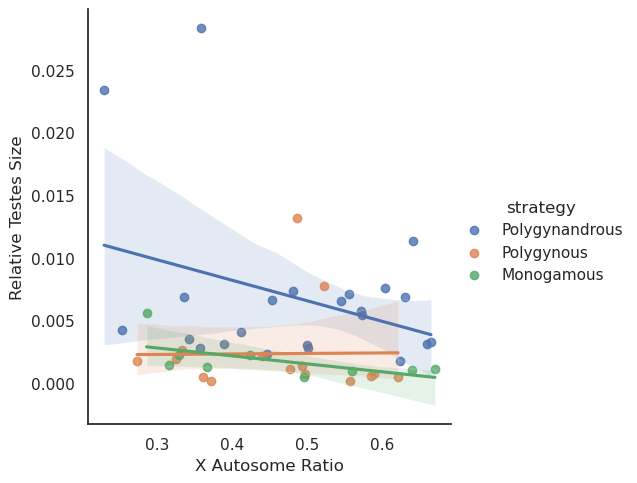

In [38]:
sns.lmplot(selected_clusters.loc[selected_clusters.strategy != "Polyandrous"], x="X Autosome Ratio", y="Relative Testes Size", hue="strategy")

In [39]:
selected_clusters.loc[~pd.isna(selected_clusters["Relative Testes Size"])].sort_values("Relative Testes Size")

species  cluster  females  males      aut_pi  \
102          Gorilla_gorilla_ssp        0       22      7  189.796965   
99          Gorilla_beringei_ssp        1        5      4  105.694000   
299             Pongo_abelii_ssp        0       10      7  266.180255   
302           Pongo_pygmaeus_ssp        0        9      6  191.073099   
274        Pithecia_pithecia_ssp        0        2      2  143.715814   
..                           ...      ...      ...    ...         ...   
333  Leontocebus_nigricollis_ssp        0        1      0  148.559907   
209        Loris_tardigradus_ssp        0        0      2  211.519566   
222      Galagoides_demidoff_ssp        0        1      0  231.853290   
196          Mirza_coquereli_ssp        0        1      0  126.745616   
193       Microcebus_murinus_ssp        0        7      7  381.399559   

     aut_divergence        x_pi  x_divergence     score  X Autosome Ratio  \
102      360.077751  105.613349    172.487021  1.954494          0.556454   
99       442.465106   39.344986    214.487976  3.453304          0.372254   
299      467.802249  165.212448    229.651758  2.852209          0.620679   
302      344.886898   69.037761     99.065672  2.665163          0.361316   
274      242.181279   71.172295     87.798606  3.697927          0.495229   
..              ...         ...           ...       ...               ...   
333     2869.877565   73.655546   2418.686405  7.268877          0.495797   
209     6509.928499  135.388889   2745.658730  8.087937          0.640077   
222     6375.910347  112.627401   5561.331626  8.067135          0.485770   
196     5327.086382   29.122867   4623.689420  7.887413          0.229774   
193      702.726936  136.922664    231.138901  3.510446          0.359001   

               binomial_name        strategy  Relative Testes Size  
102          Gorilla_gorilla      Polygynous              0.000145  
99          Gorilla_beringei      Polygynous              0.000178  
299             Pongo_abelii      Polygynous              0.000429  
302           Pongo_pygmaeus      Polygynous              0.000450  
274        Pithecia_pithecia      Monogamous              0.000474  
..                       ...             ...                   ...  
333  Leontocebus_nigricollis             NaN              0.008120  
209        Loris_tardigradus  Polygynandrous              0.011336  
222      Galagoides_demidoff      Polygynous              0.013165  
196          Mirza_coquereli  Polygynandrous              0.023358  
193       Microcebus_murinus  Polygynandrous              0.028359  

[67 rows x 13 columns]

In [40]:
from scipy import stats
stats.ttest_ind(selected_clusters.loc[selected_clusters.strategy == "Monogamous"]["X Autosome Ratio"],
                selected_clusters.loc[selected_clusters.strategy == "Polygynandrous"]["X Autosome Ratio"])

TtestResult(statistic=1.807775061574822, pvalue=0.07465091165913293, df=75.0)

In [41]:
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind

In [42]:
selected_clusters["samples"] = selected_clusters.females+selected_clusters.males #.loc[selected_clusters.strategy == "Monogamous"]

In [43]:
select_mono = selected_clusters.loc[selected_clusters.strategy == "Monogamous"]
select_polygynandry = selected_clusters.loc[selected_clusters.strategy == "Polygynandrous"]
ttest_ind(select_mono["X Autosome Ratio"], select_polygynandry["X Autosome Ratio"], usevar='unequal',
          weights=(select_mono["samples"], select_polygynandry["samples"]))

(3.413651493753728, 0.001047913877546863, 73.2137656335367)

Generating the largest X chromosome scatter for every cluster.

In [44]:
df_l = []
for s in sub_vasili.species_genotyping.unique()[:20]:
    if s == "Macaca_nemestrina_ssp":
        # Discovered a problem with nemestrina, fixing
        continue
    p = '../results/window_stats_20x_inds/{}_100kb_pi_fst0.1.txt'.format(s)
    df = pd.read_csv(p, sep="\t")
    cluster_count = sum([x.startswith("pi") for x in df.columns])
    if len(df.loc[(df.chr_type == "chrX")]) == 0:
        continue
    largest_x = df.loc[(df.chr_type == "chrX")].chrom.value_counts().index[0]
    x_df = df.loc[(df.chrom == largest_x)]
    for x in range(cluster_count):
        df_sub = pd.DataFrame({"window_start": x_df.window_start, "x_pi": x_df.iloc[:,x*2+3], "x_divergence": x_df.iloc[:,x*2+2],
                              "callable_frac": x_df.callable_frac})
        df_sub["species"] = s
        df_sub["cluster"] = x
        df_l.append(pd.DataFrame(df_sub))
large_x_df = pd.concat(df_l)
large_x_df["species_cluster"] = large_x_df.species+"_"+large_x_df.cluster.astype(str)

In [45]:
rolling_x = large_x_df.groupby(["species", "species_cluster"])[["window_start", "x_pi", "x_divergence", "callable_frac"]].rolling(10).mean().reset_index()

In [46]:
rolling_x.loc[(rolling_x.window_start <= 550000)]

species                    species_cluster  \
9      Allenopithecus_nigroviridis_ssp  Allenopithecus_nigroviridis_ssp_0   
10     Allenopithecus_nigroviridis_ssp  Allenopithecus_nigroviridis_ssp_0   
1332   Allenopithecus_nigroviridis_ssp  Allenopithecus_nigroviridis_ssp_1   
1333   Allenopithecus_nigroviridis_ssp  Allenopithecus_nigroviridis_ssp_1   
2655             Alouatta_belzebul_ssp            Alouatta_belzebul_ssp_0   
2656             Alouatta_belzebul_ssp            Alouatta_belzebul_ssp_0   
3149             Alouatta_belzebul_ssp            Alouatta_belzebul_ssp_1   
3150             Alouatta_belzebul_ssp            Alouatta_belzebul_ssp_1   
3643               Alouatta_caraya_ssp              Alouatta_caraya_ssp_0   
3644               Alouatta_caraya_ssp              Alouatta_caraya_ssp_0   
4137             Alouatta_discolor_ssp            Alouatta_discolor_ssp_0   
4138             Alouatta_discolor_ssp            Alouatta_discolor_ssp_0   
4631             Alouatta_discolor_ssp            Alouatta_discolor_ssp_1   
4632             Alouatta_discolor_ssp            Alouatta_discolor_ssp_1   
5125                Alouatta_juara_ssp               Alouatta_juara_ssp_0   
5126                Alouatta_juara_ssp               Alouatta_juara_ssp_0   
5619          Alouatta_macconnelli_ssp         Alouatta_macconnelli_ssp_0   
5620          Alouatta_macconnelli_ssp         Alouatta_macconnelli_ssp_0   
6113             Alouatta_palliata_ssp            Alouatta_palliata_ssp_0   
6114             Alouatta_palliata_ssp            Alouatta_palliata_ssp_0   
6607            Alouatta_seniculus_ssp           Alouatta_seniculus_ssp_0   
6608            Alouatta_seniculus_ssp           Alouatta_seniculus_ssp_0   
7101            Alouatta_seniculus_ssp           Alouatta_seniculus_ssp_1   
7102            Alouatta_seniculus_ssp           Alouatta_seniculus_ssp_1   
7595            Alouatta_seniculus_ssp           Alouatta_seniculus_ssp_2   
7596            Alouatta_seniculus_ssp           Alouatta_seniculus_ssp_2   
8089                  Aotus_azarai_ssp                 Aotus_azarai_ssp_0   
8090                  Aotus_azarai_ssp                 Aotus_azarai_ssp_0   
8794                  Aotus_azarai_ssp                 Aotus_azarai_ssp_1   
8795                  Aotus_azarai_ssp                 Aotus_azarai_ssp_1   
9499            Aotus_griseimembra_ssp           Aotus_griseimembra_ssp_0   
9500            Aotus_griseimembra_ssp           Aotus_griseimembra_ssp_0   
10204              Aotus_nancymaae_ssp              Aotus_nancymaae_ssp_0   
10205              Aotus_nancymaae_ssp              Aotus_nancymaae_ssp_0   
10909            Aotus_trivirgatus_ssp            Aotus_trivirgatus_ssp_0   
10910            Aotus_trivirgatus_ssp            Aotus_trivirgatus_ssp_0   
11614             Aotus_vociferans_ssp             Aotus_vociferans_ssp_0   
11615             Aotus_vociferans_ssp             Aotus_vociferans_ssp_0   
12319             Ateles_belzebuth_ssp             Ateles_belzebuth_ssp_0   
12320             Ateles_belzebuth_ssp             Ateles_belzebuth_ssp_0   
12813                Ateles_chamek_ssp                Ateles_chamek_ssp_0   
12814                Ateles_chamek_ssp                Ateles_chamek_ssp_0   
13307                Ateles_chamek_ssp                Ateles_chamek_ssp_1   
13308                Ateles_chamek_ssp                Ateles_chamek_ssp_1   
13801                Ateles_chamek_ssp                Ateles_chamek_ssp_2   
13802                Ateles_chamek_ssp                Ateles_chamek_ssp_2   
14295             Ateles_geoffroyi_ssp             Ateles_geoffroyi_ssp_0   
14296             Ateles_geoffroyi_ssp             Ateles_geoffroyi_ssp_0   
14789            Ateles_marginatus_ssp            Ateles_marginatus_ssp_0   
14790            Ateles_marginatus_ssp            Ateles_marginatus_ssp_0   
15283              Ateles_paniscus_ssp              Ateles_paniscus_ssp_0   
15284              Ateles_p

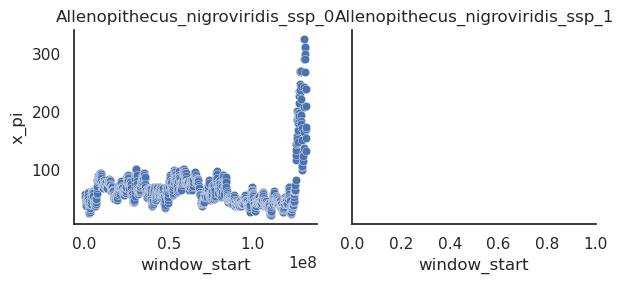

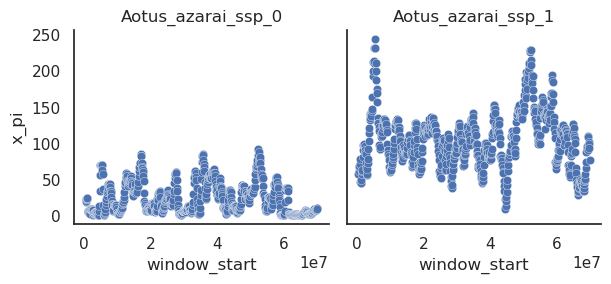

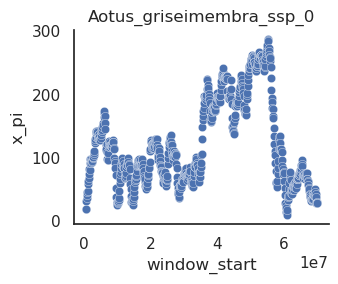

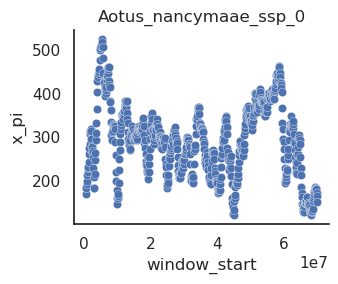

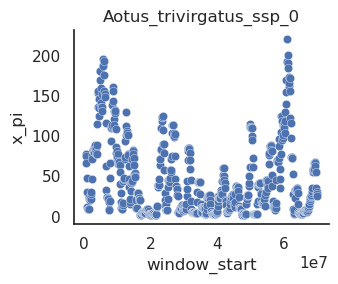

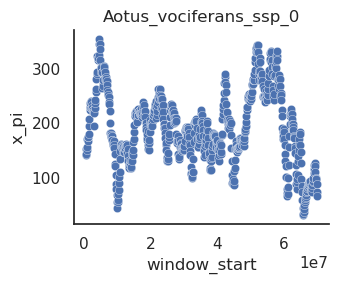

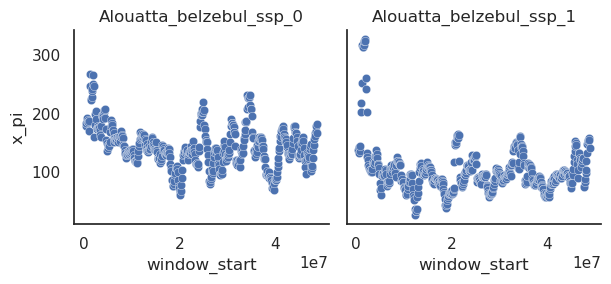

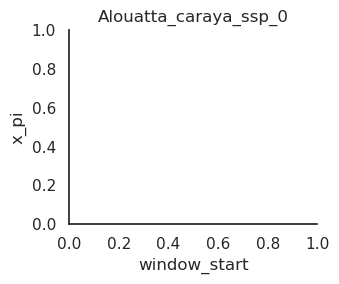

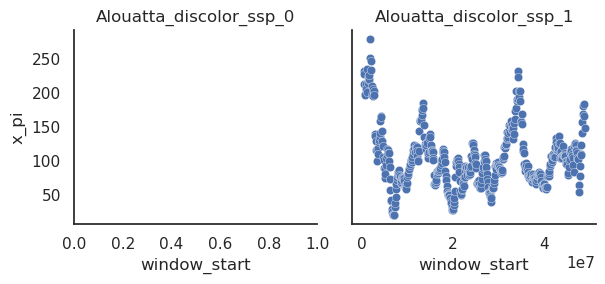

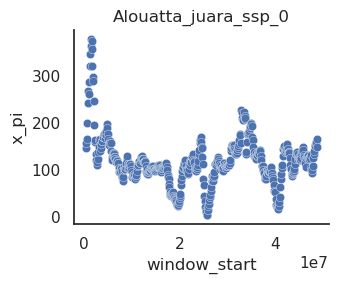

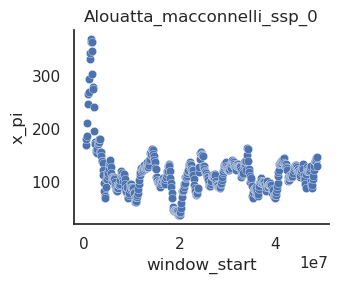

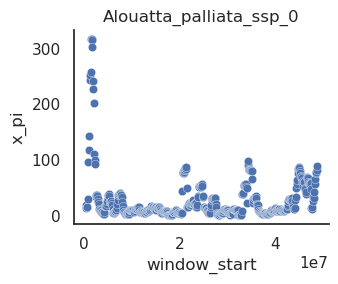

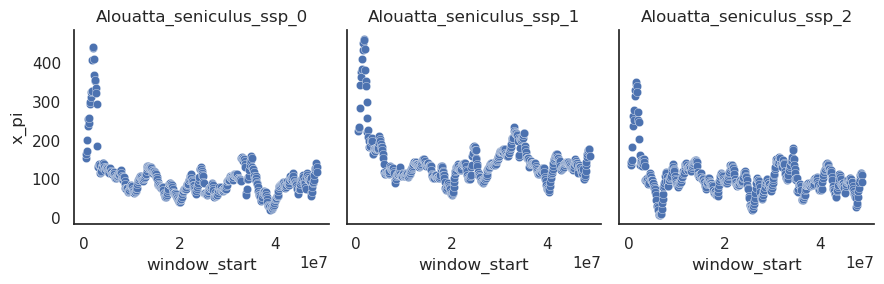

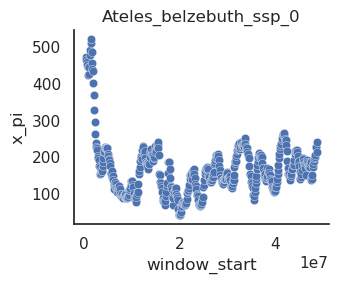

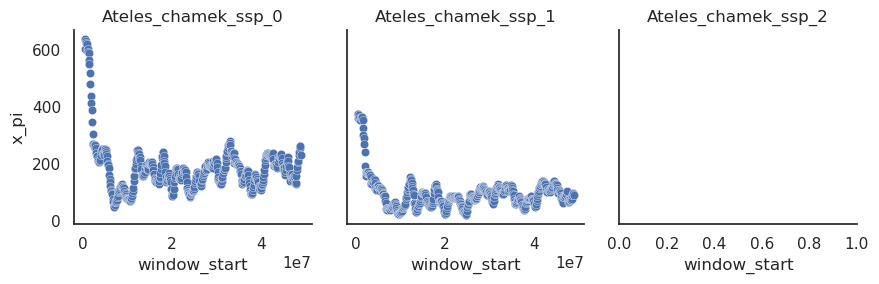

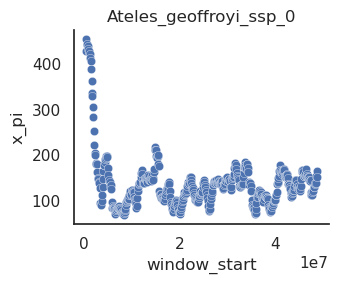

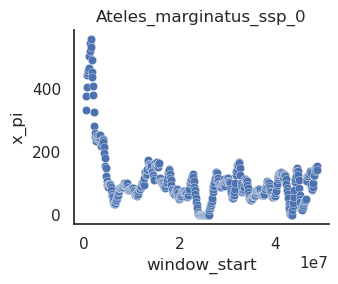

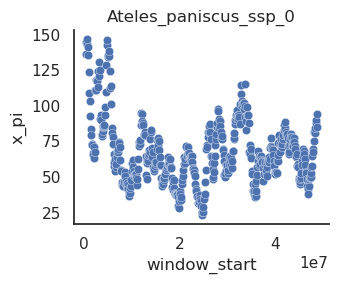

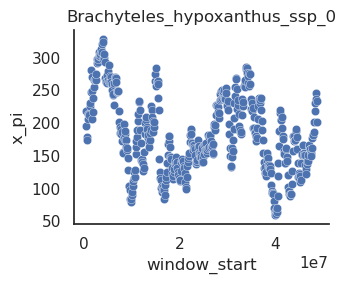

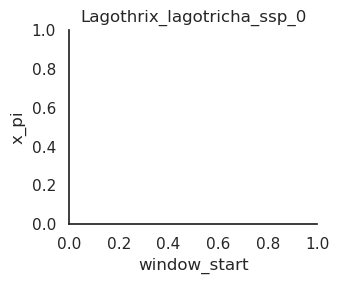

In [47]:
for s in large_x_df.species.unique()[:20]:
    g = sns.FacetGrid(rolling_x.loc[rolling_x.species == s], col="species_cluster", col_wrap=3, sharex=False)
    g.map(sns.scatterplot, "window_start", "x_pi", linewidth = 0.25)
    #g.set(ylim=(-0.1, 3))
    g.set_titles(col_template="{col_name}", row_template="{row_name}")

In [48]:
for s in large_x_df.species.unique()[40:60]:
    g = sns.FacetGrid(rolling_x.loc[(rolling_x.species == s) & (rolling_x.callable_frac >= 0.5)], col="species_cluster", col_wrap=3, sharex=False)
    g.map(sns.scatterplot, "window_start", "x_pi", linewidth = 0.25)
    #g.set(ylim=(-0.1, 3))
    g.set_titles(col_template="{col_name}", row_template="{row_name}")